# Inspection of GAN generations

1. Distribution of decoder labels
2. Scoring
4. Mean spectrograms

In [4]:
import re
from collections import defaultdict
from pathlib import Path

import librosa as lbr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from rich.progress import track

In [5]:
src = Path("/run/media/nathan/Nathan4T/Nathan-canarygan/generation")
reports = Path("/run/media/nathan/Nathan4T/Nathan-canarygan/reports/generated_syllables")

reports.mkdir(parents=True, exist_ok=True)

In [6]:
version_selection = [1, 5, 8, 9, 13, 14, 16, 18]
files = []
for version in version_selection:
    fps = list(src.glob(f"*version_{version}/*.npz"))
    if len(fps) == 0:
        continue
    d = np.load(fps[0])
    files.append(fps[0])

In [7]:
list(d.keys())

['x',
 'y',
 'z',
 'version',
 'epoch',
 'step',
 'y_mean',
 'y_max',
 'y_argmax',
 'y_sum',
 'y_svm',
 'y_knn',
 'y_esn',
 'y_knn_deltas',
 'y_svm_deltas',
 'y_esn_deltas',
 'y_svm_mfcc-classic',
 'y_knn_mfcc-classic',
 'y_esn_mfcc-classic']

In [18]:
archives = [np.load(f, allow_pickle=True) for f in files]

data_table = {
    "file": files,
    "version": [int(d["version"]) for d in archives],
    "epoch": [int(d["epoch"]) for d in archives],
    "y": [d["y_argmax"] for d in archives],
    "sr": 16000,
    "z": [d["z"] for d in archives],
    # "hdbscan_y": [d["hdbscan_y"] for d in archives],
    # "hdbscan_remap": [d["hdbscan_remap"] for d in archives],
    "kind": "gen",
    "y_esn_deltas": [d["y_esn_deltas"] for d in archives],
    "y_knn_deltas": [d["y_knn_deltas"] for d in archives],
    "y_svm_deltas": [d["y_svm_deltas"] for d in archives],
    "y_esn_classic": [d["y_esn_mfcc-classic"] for d in archives],
    "y_knn_classic": [d["y_knn_mfcc-classic"] for d in archives],
    "y_svm_classic": [d["y_svm_mfcc-classic"] for d in archives],   
    # "x": [d["x"] for d in archives]
}

gdf = pd.DataFrame(data_table)\
        .sort_values(by=["version", "epoch"])

In [19]:
# gdf = gdf.explode(["x", "y", "z", "hdbscan_y", "hdbscan_remap"]).reset_index(drop=True)
gdf = gdf.explode(["y", "z", "y_esn_deltas", "y_knn_deltas", "y_svm_deltas", "y_esn_classic", "y_knn_classic", "y_svm_classic",]).reset_index(drop=True) #"hdbscan_y", "hdbscan_remap"]).reset_index(drop=True)
gdf

,file,version,epoch,y,sr,z,kind,y_esn_deltas,y_knn_deltas,y_svm_deltas,y_esn_classic,y_knn_classic,y_svm_classic
0,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,1,899,M,16000,"[0.63298666, 0.7446797, 0.4599917]",gen,EARLY_15,H,H,Q,H,H
1,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,1,899,J1,16000,"[0.6271548, -0.85452783, 0.74188733]",gen,EARLY_45,J2,J1,J1,J2,J1
2,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,1,899,EARLY_7370,16000,"[0.023184419, -0.6657444, -0.9290445]",gen,E,EARLY_45,EARLY_45,J2,EARLY_45,EARLY_45
3,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,1,899,D,16000,"[0.4581777, -0.9521947, -0.86195207]",gen,EARLY_45,EARLY_45,EARLY_45,D,EARLY_45,EARLY_45
4,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,1,899,OT_57765,16000,"[0.24554491, -0.6069031, -0.7536752]",gen,EARLY_45,EARLY_45,EARLY_45,EARLY_30,EARLY_45,EARLY_45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,18,1514,WN,16000,"[-0.67667556, -0.2716962, 0.5694691]",gen,EARLY_45,J1,J1,EARLY_45,J1,J1
79996,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,18,1514,WN,16000,"[-0.03440869, -0.021856904, -0.64551115]",gen,A,A,A,A,EARLY_15,H
79997,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,18,1514,WN,16000,"[-0.541615, -0.036003232, 0.9899912]",gen,EARLY_45,E,EARLY_45,EARLY_30,E,EARLY_45
79998,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,18,1514,WN,16000,"[-0.9563978, -0.35509884, 0.8231821]",gen,EARLY_45,J1,J1,EARLY_45,J1,J1


['A', 'B1', 'B2', 'C', 'D', 'E', 'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'Q', 'R', 'V']


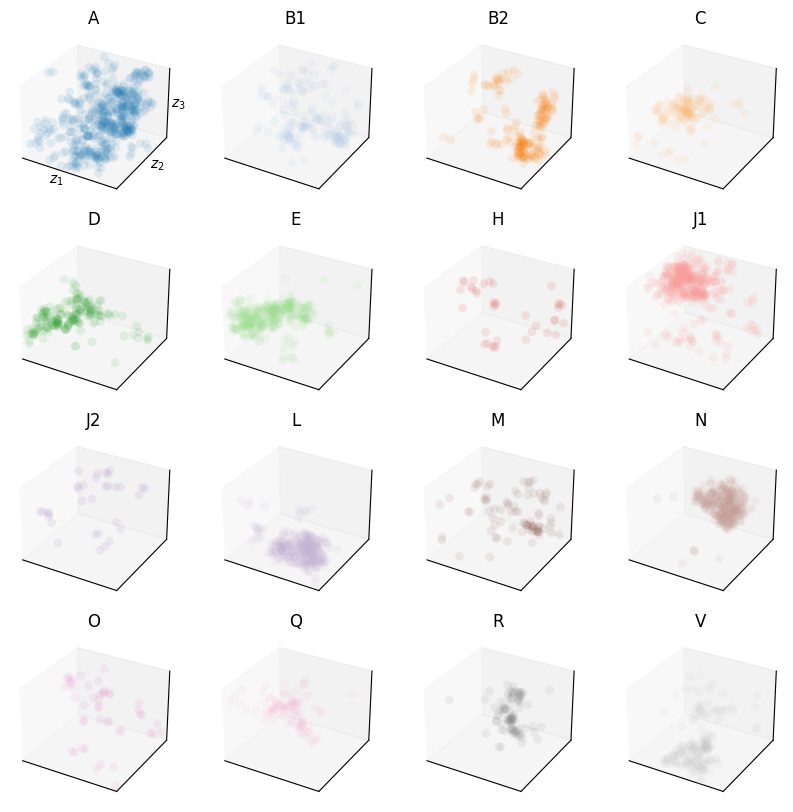

In [22]:
fig, axs = plt.subplots(4, 4, figsize=(10, 10), subplot_kw={'projection': '3d'})

predictor = "y_esn_classic"

zdf = gdf.query(f"version==16 and {predictor} not in ['X', 'EARLY_15', 'EARLY_30', 'EARLY_45', 'WN']")

axs = axs.flatten()

labels = sorted(zdf[predictor].unique())

print(labels)

for i, lbl in enumerate(labels):  # except X class
    ax = axs[i]
    c = sns.color_palette("tab20")[i]
    z3d = tuple(np.vstack(zdf.query(f"{predictor}==@lbl").z.values).T)
    
    ax.set_xlim(-1.01, 1.01)
    ax.set_ylim(-1.01, 1.01)
    ax.set_zlim3d(-1.01, 1.01)
    
    ax.scatter(*z3d, s=40, color=c, lw=0, alpha=0.1)
    
    ax.set_title(lbl)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    if i == 0:
        ax.text(0.5, -2.5, 0.0, "$z_1$")
        ax.text(1.8, -1.2, 0.0, "$z_2$")
        ax.text(1.6, 0.0, 0.8, "$z_3$")

# fig.savefig("../data/latent_space-version_16-epoch_989.pdf", bbox_inches="tight")

In [123]:
from scipy.io import wavfile

zdf = gdf.query("version==16 and hdbscan_remap!='X'")
labels = sorted(zdf.hdbscan_remap.unique())

n_samples = 30

for lbl in labels:
    x = zdf.query("hdbscan_remap==@lbl").x.values
    x = np.concatenate([x_[:round(0.25*16000)] for x_ in x[:n_samples]])
    filename = Path(f"../data/{lbl}-version_16-epoch_989.wav")
    wavfile.write(filename, data=x, rate=16000)

In [ ]:
for version, epoch in track(list(product(version_selection, epoch_selection))):
    sel = gdf.query("version==@version and epoch==@epoch")
    idxs = sel.index
    d = np.load(sel.file.unique()[0])
    x = d["x"][:, :max_length]
    x = make_spectrogram(x)
    g_embeddings[idxs] = reducer.transform(np.concatenate(x.T).T)

In [39]:
archives = defaultdict(list)
version_selection = [1, 5, 8, 9, 13, 14, 16, 18]
for version in version_selection:
    for file in src.glob(f"version_{version}/*.npz"):
        m = re.search(r"generation-version_(?P<version>[0-9]+)-epoch_(?P<epoch>[0-9]+)-step_(?P<step>[0-9]+)\.npz", file.name)
        version, epoch, step = m.groups()
        archives["version"].append(int(version))
        archives["epoch"].append(int(epoch))
        archives["step"].append(int(step))
        archives["file"].append(str(file))
    
        d = np.load(file)
    
        archives["y"].append(d["y"].tolist())
        archives["y_max"].append(d["y_max"].tolist())
        archives["y_mean"].append(d["y_mean"].tolist())
        archives["y_argmax"].append(d["y_argmax"].tolist())
        archives["y_sum"].append(d["y_sum"].tolist())
        archives["z"].append(d["z"])
        archives["idx"].append(list(range(len(d["y"].tolist()))))

        archives["y_esn_deltas"].append(d["y_esn_deltas"].tolist())
        archives["y_svm_deltas"].append(d["y_svm_deltas"].tolist())
        archives["y_knn_deltas"].append(d["y_knn_deltas"].tolist())

df = pd.DataFrame(archives).sort_values(by=["version", "epoch"])
df = df.explode(["y", "y_max", "y_mean", "y_argmax", "y_sum", "z", "idx", "y_esn_deltas", "y_svm_deltas", "y_knn_deltas",]).reset_index(drop=True)
df

,version,epoch,step,file,y,y_max,y_mean,y_argmax,y_sum,z,idx,y_esn_deltas,y_svm_deltas,y_knn_deltas
0,1,14,1350,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_2255,EARLY_2255,EARLY_2255,EARLY_2255,EARLY_2255,"[0.2205199, 0.35827112, -0.17535031]",0,WN,EARLY_15,R
1,1,14,1350,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,H,EARLY_7370,H,EARLY_7370,H,"[-0.39085662, -0.31558883, 0.011331677]",1,EARLY_30,EARLY_30,EARLY_30
2,1,14,1350,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_False,B2,EARLY_False,B2,EARLY_False,"[0.31183076, 0.16984856, 0.72822845]",2,EARLY_15,EARLY_30,EARLY_15
3,1,14,1350,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_2255,EARLY_2255,EARLY_2255,EARLY_2255,EARLY_2255,"[0.9995283, -0.51731455, -0.6604717]",3,EARLY_15,EARLY_15,EARLY_45
4,1,14,1350,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_False,EARLY_2255,EARLY_False,EARLY_2255,EARLY_False,"[0.6735287, -0.5789075, 0.057384133]",4,EARLY_30,EARLY_45,EARLY_45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179995,18,1514,178014,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_42561,WN,EARLY_42561,WN,EARLY_42561,"[-0.67667556, -0.2716962, 0.5694691]",9995,EARLY_45,J1,J1
1179996,18,1514,178014,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_42561,WN,EARLY_42561,WN,EARLY_42561,"[-0.03440869, -0.021856904, -0.64551115]",9996,A,A,A
1179997,18,1514,178014,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_42561,WN,EARLY_42561,WN,EARLY_42561,"[-0.541615, -0.036003232, 0.9899912]",9997,EARLY_45,EARLY_45,E
1179998,18,1514,178014,/run/media/nathan/Nathan4T/Nathan-canarygan/ge...,EARLY_42561,WN,EARLY_42561,WN,EARLY_42561,"[-0.9563978, -0.35509884, 0.8231821]",9998,EARLY_45,J1,J1


In [40]:
epochs = df.epoch.unique()
epochs

array([  14,   29,   44,  149,  299,  314,  449,  554,  614,  704,  809,
        899,  989, 1514, 1994])

In [41]:
versions = df.version.unique()
versions

array([ 1,  5,  8,  9, 13, 14, 16, 18])

In [43]:
labels = np.sort(df["y_knn_deltas"].unique())
labels

array(['A', 'B1', 'B2', 'C', 'D', 'E', 'EARLY_15', 'EARLY_30', 'EARLY_45',
       'H', 'J1', 'J2', 'L', 'M', 'N', 'O', 'Q', 'R', 'V'], dtype=object)

In [44]:
reals = [l for l in labels if "EARLY" not in l and "OT" not in l and "WN" not in l]
fakes = [l for l in labels if l not in reals]

## Distribution of decoder labels

We look at "reals" (16 syll.) vs "fakes" (OT, EARLY, WN; X) in proportion.


Output()

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

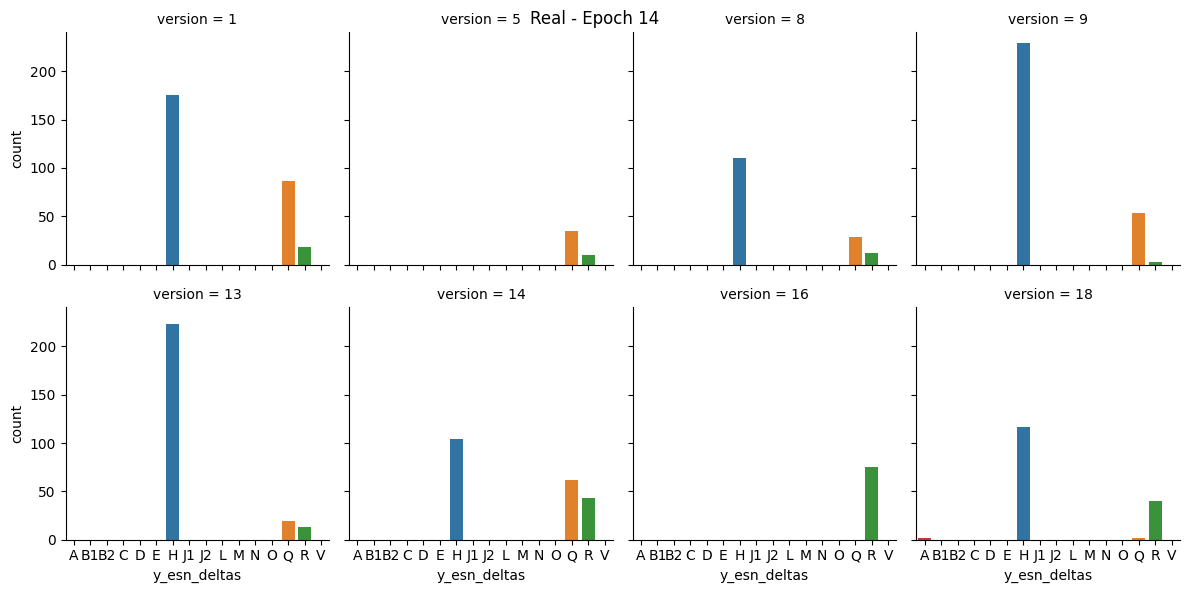

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

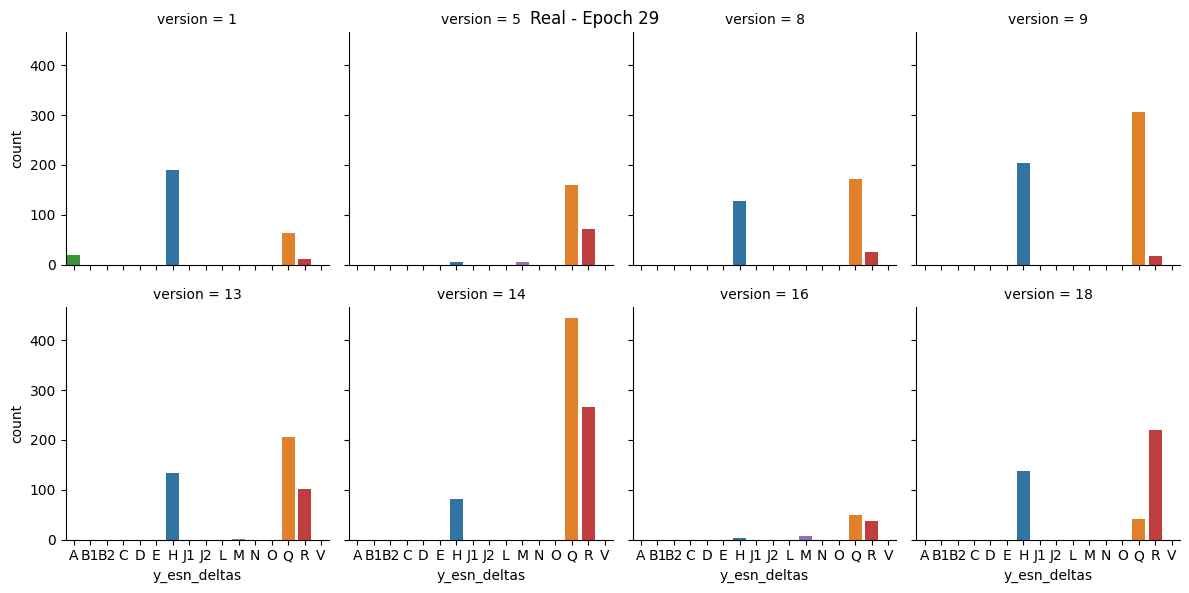

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

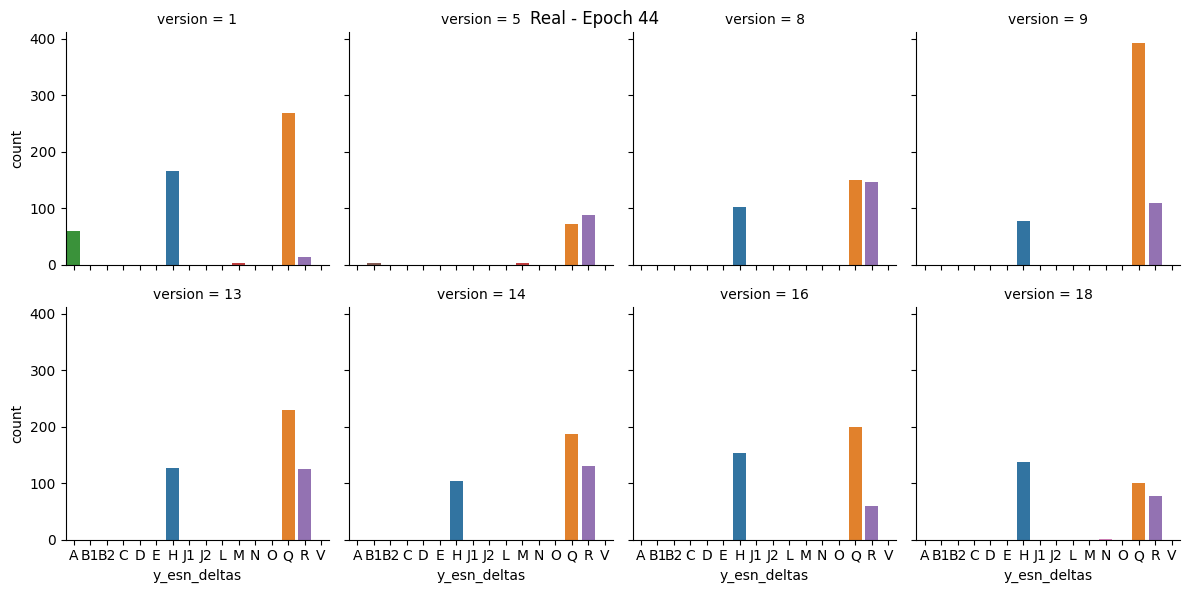

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

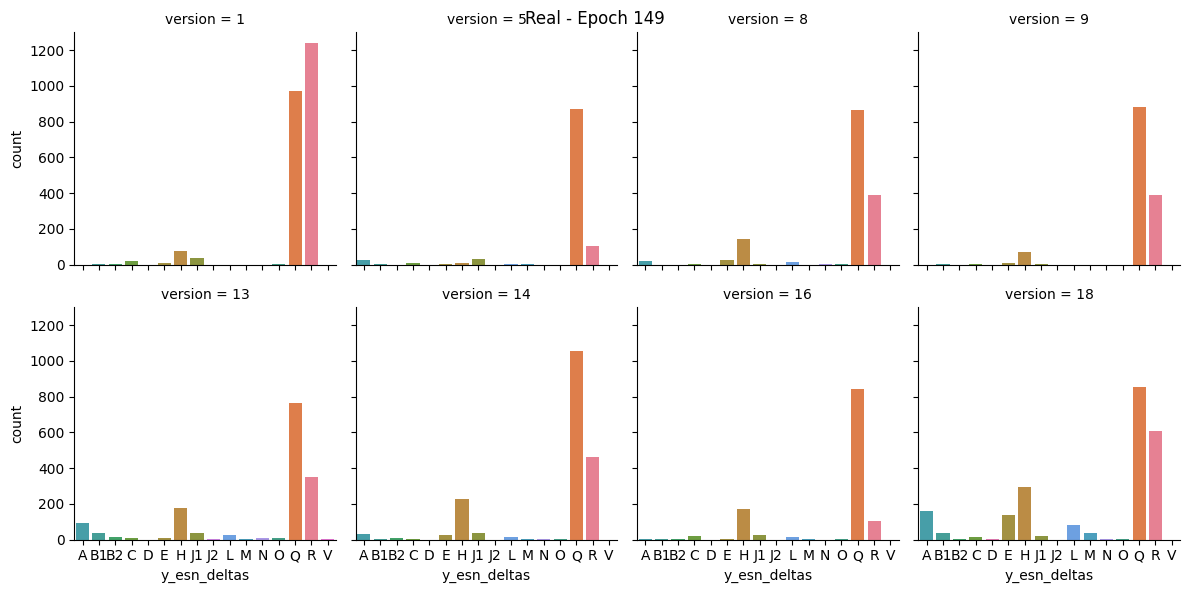

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

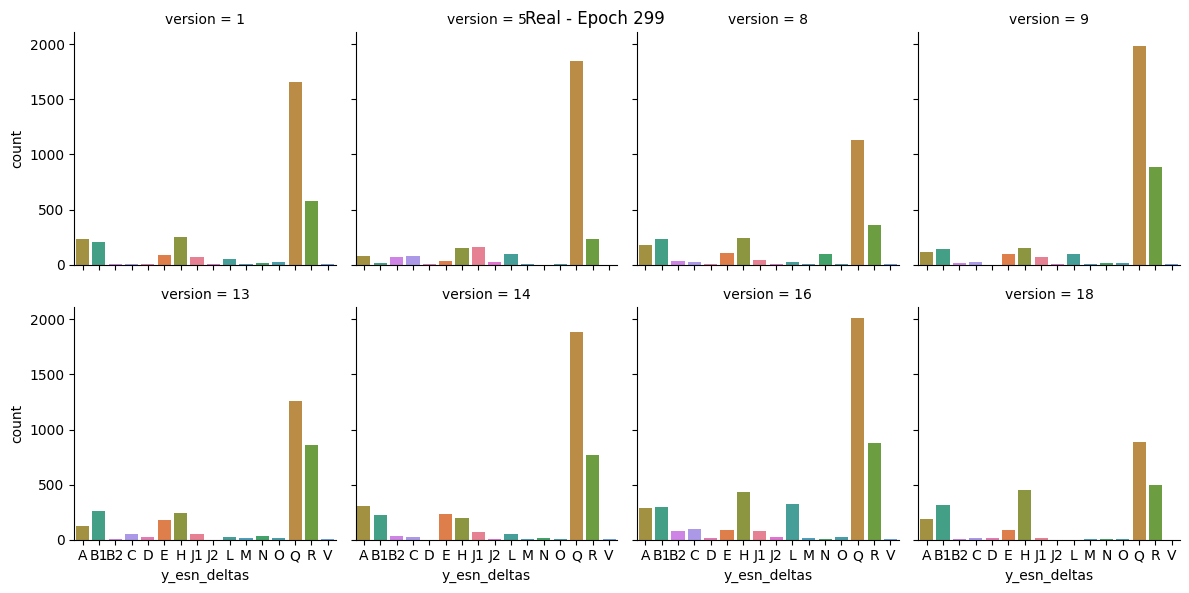

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

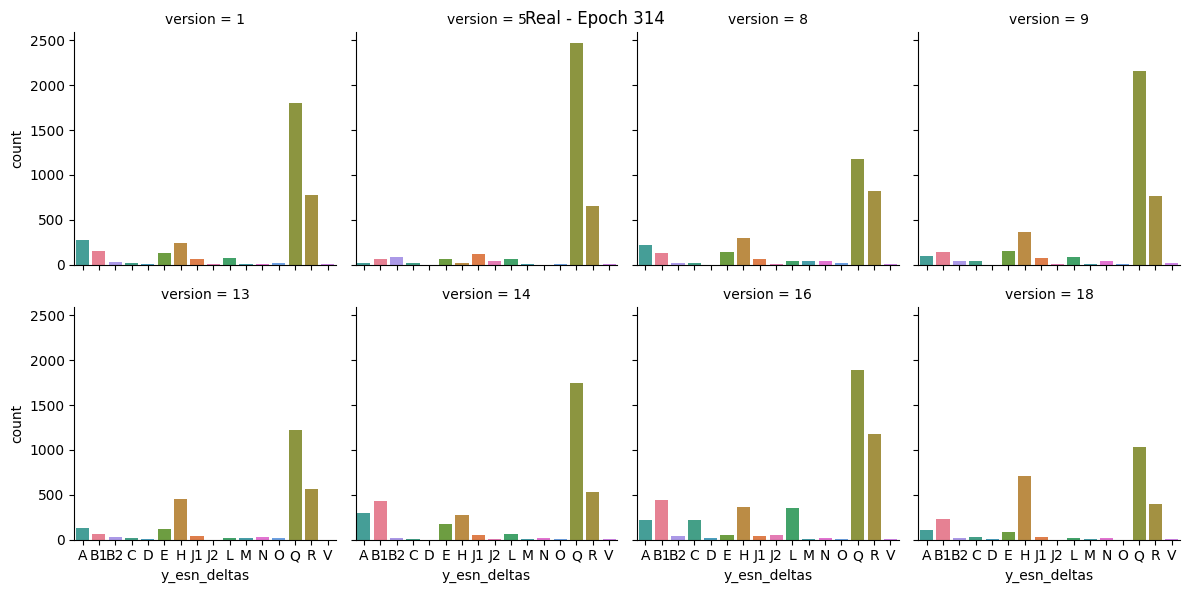

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

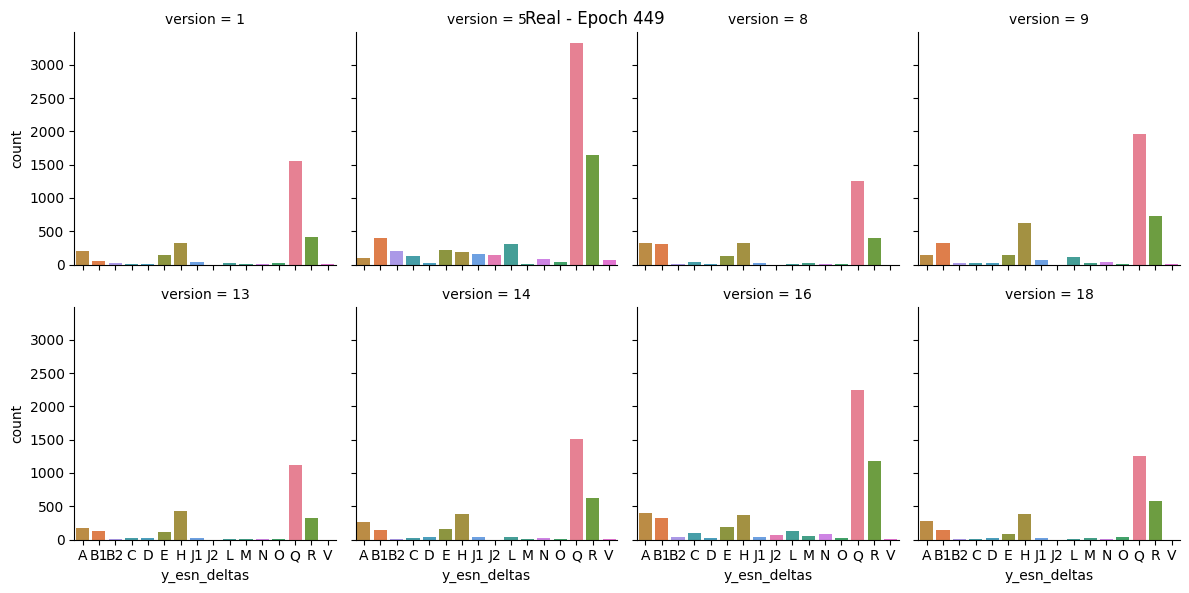

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

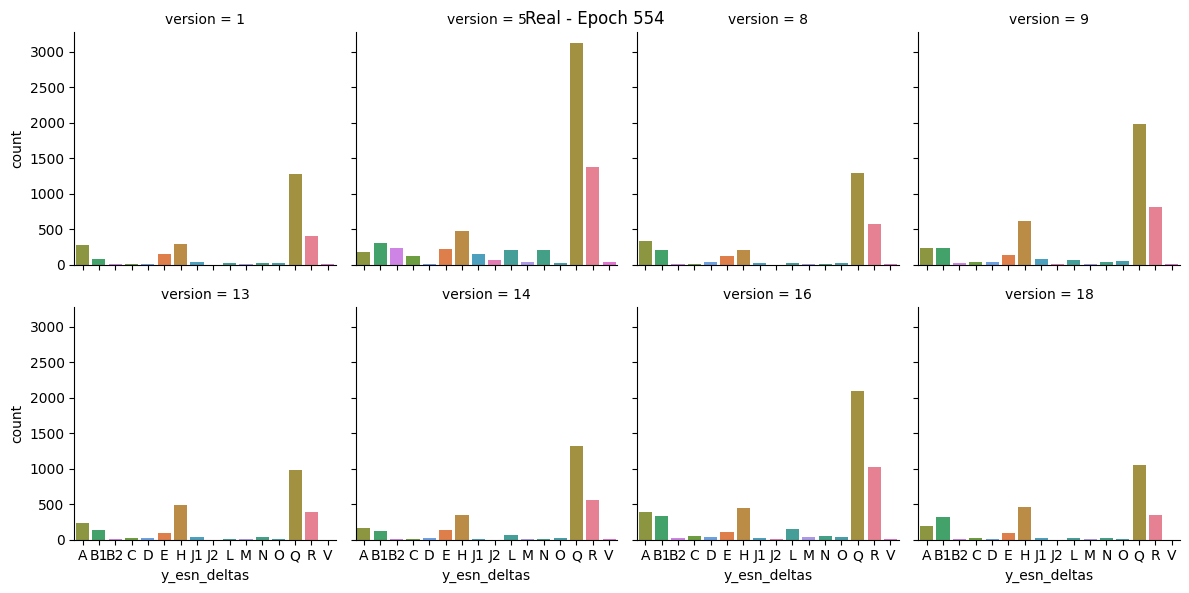

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

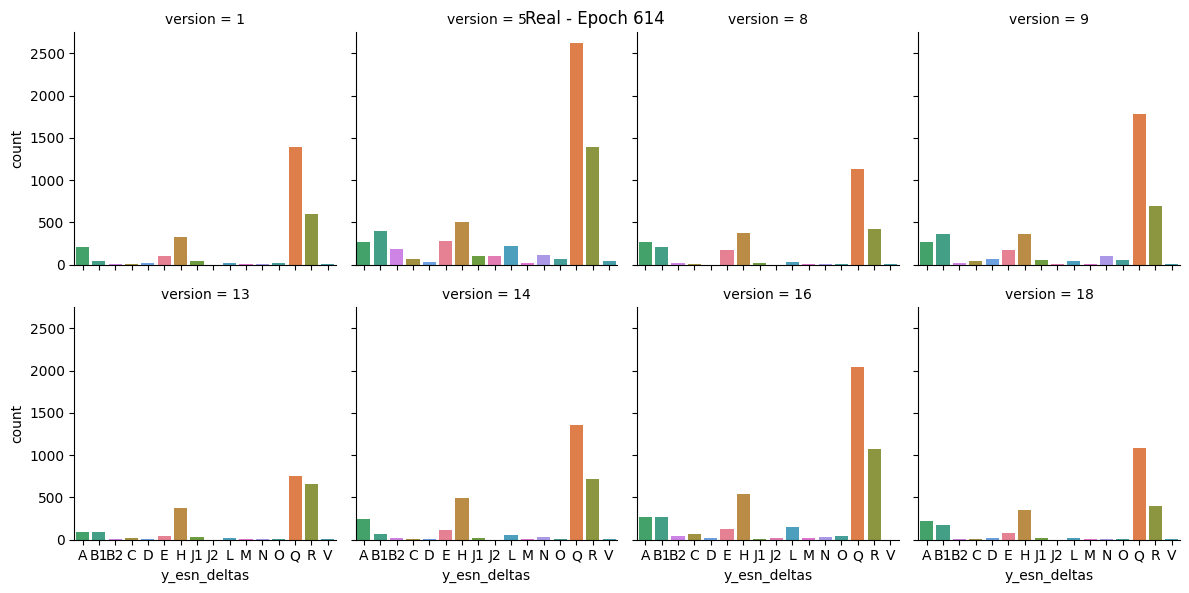

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

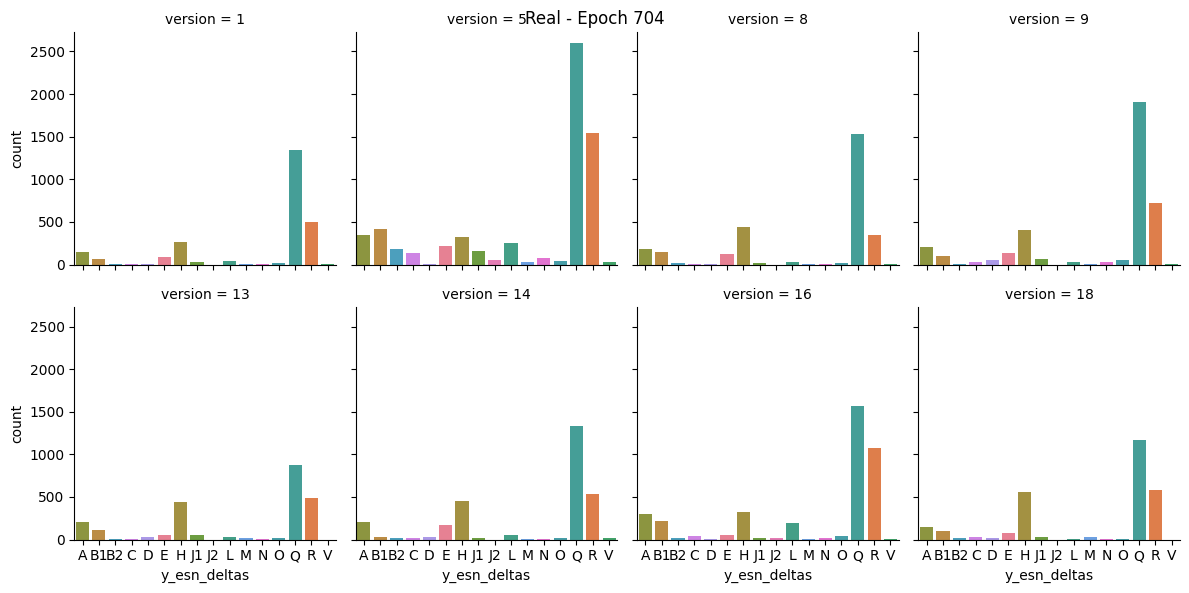

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

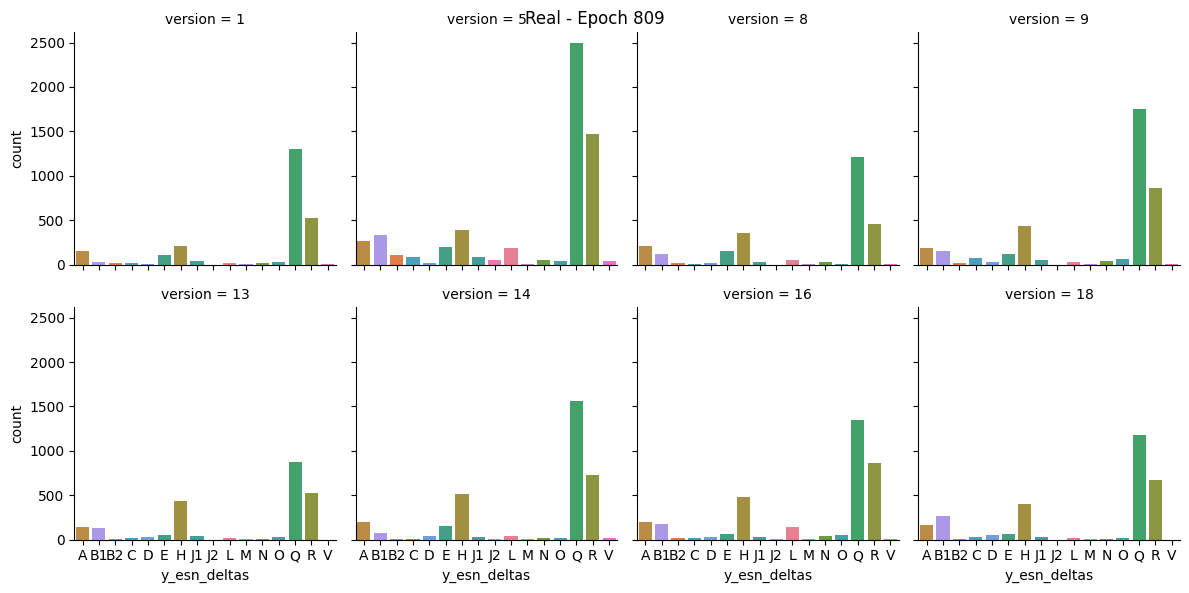

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

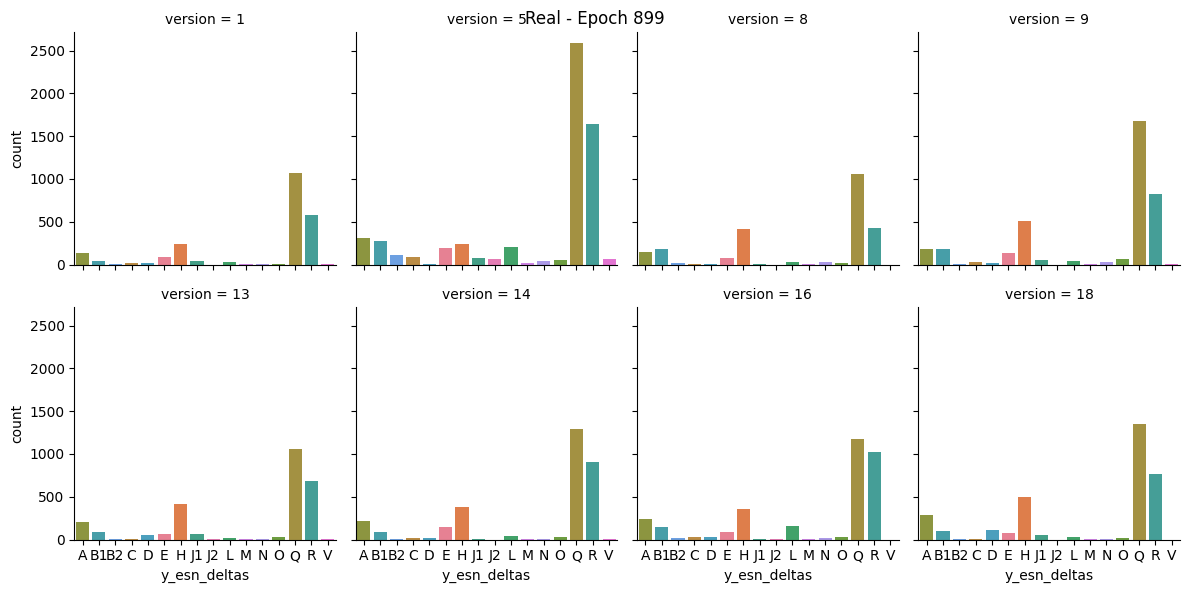

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

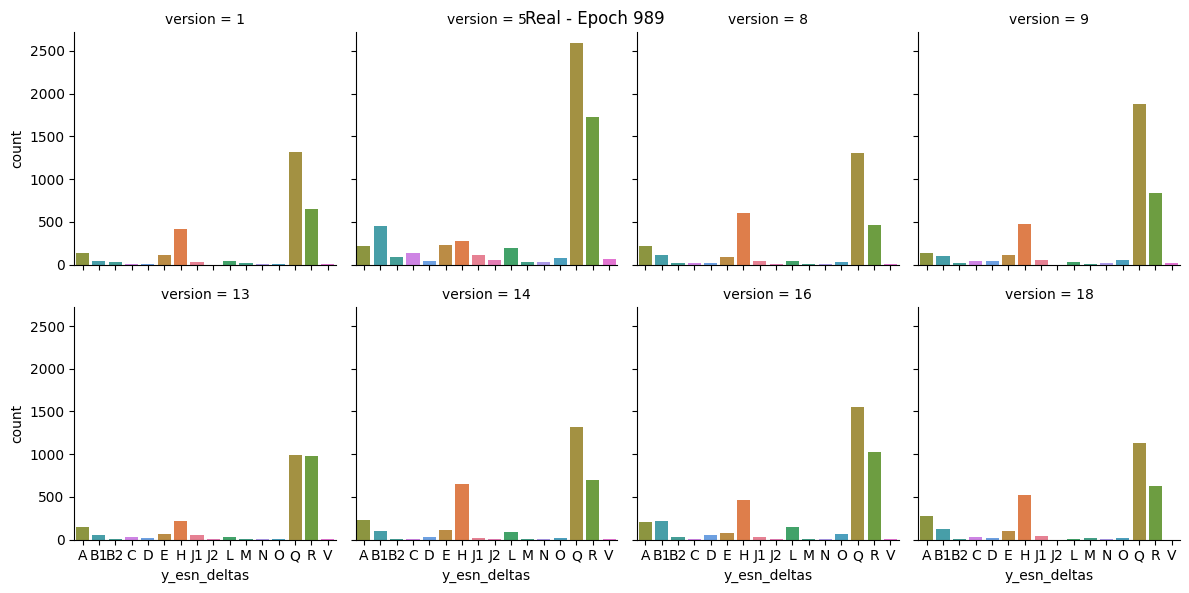

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

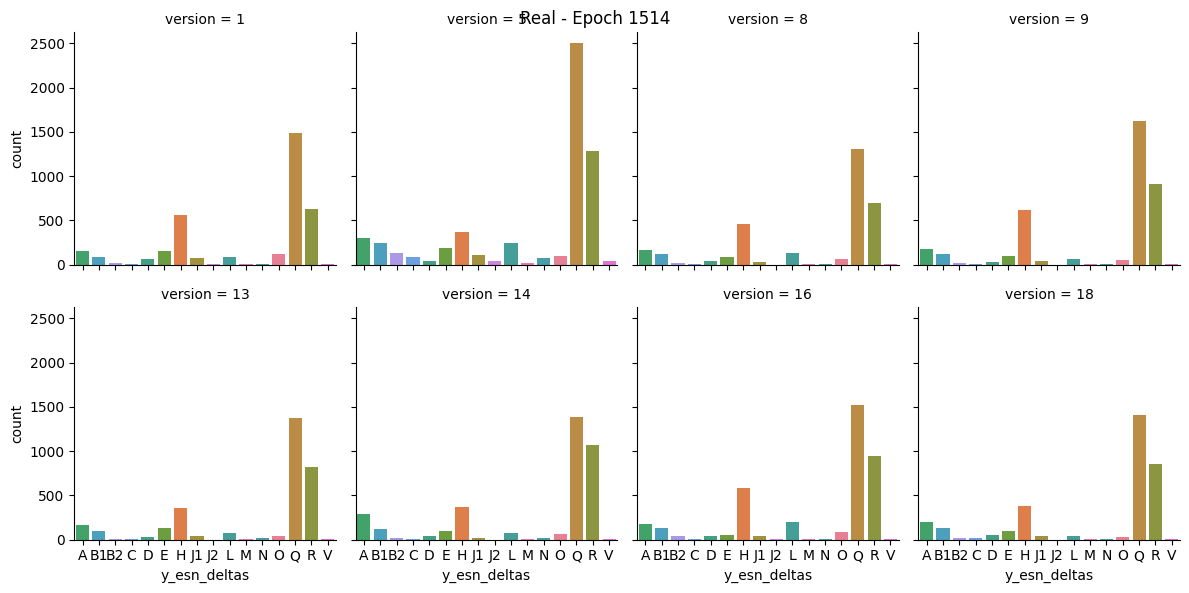

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

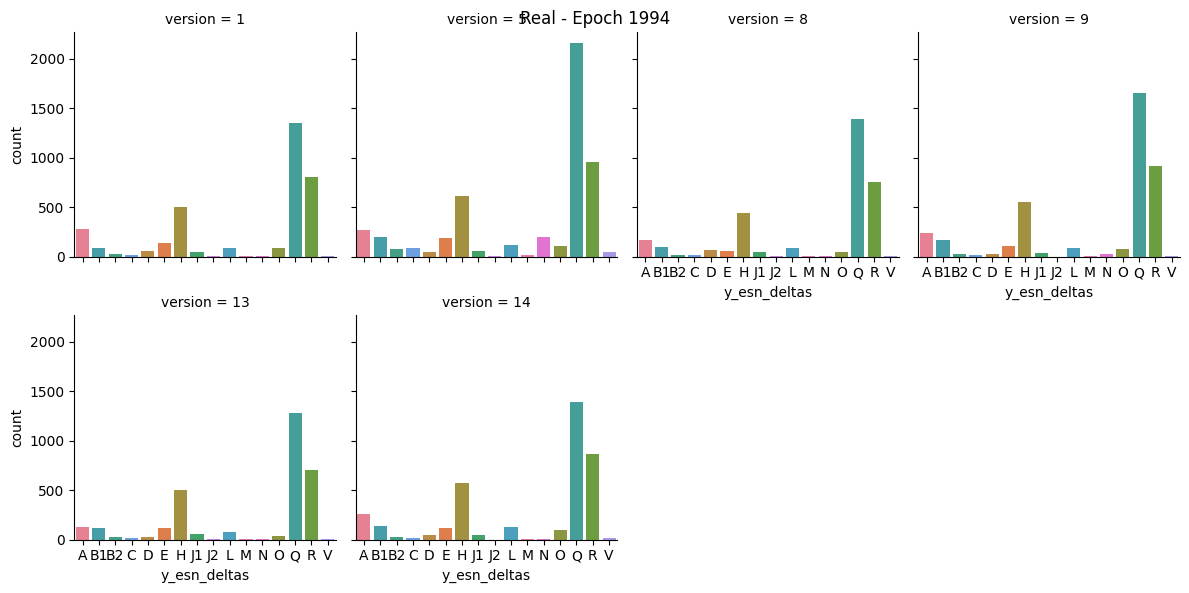

In [56]:
variable = "y_esn_deltas"
count_report = reports / f"counts-{variable}"
count_report.mkdir(parents=True, exist_ok=True)
for e in track(epochs, "Exporting figures..."):
    plt.clf()
    g = sns.FacetGrid(data=df.query(f"epoch==@e and {variable} in @reals"), col="version", hue=variable, col_wrap=4)
    g.map(sns.countplot, variable, order=reals, hue_order=reals)
    g.figure.suptitle(f"Real - Epoch {e}")
    plt.show()
    #plt.savefig(count_report / f"reals_count-{variable}-epoch_{e}.pdf", bbox_inches="tight")

Output()

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

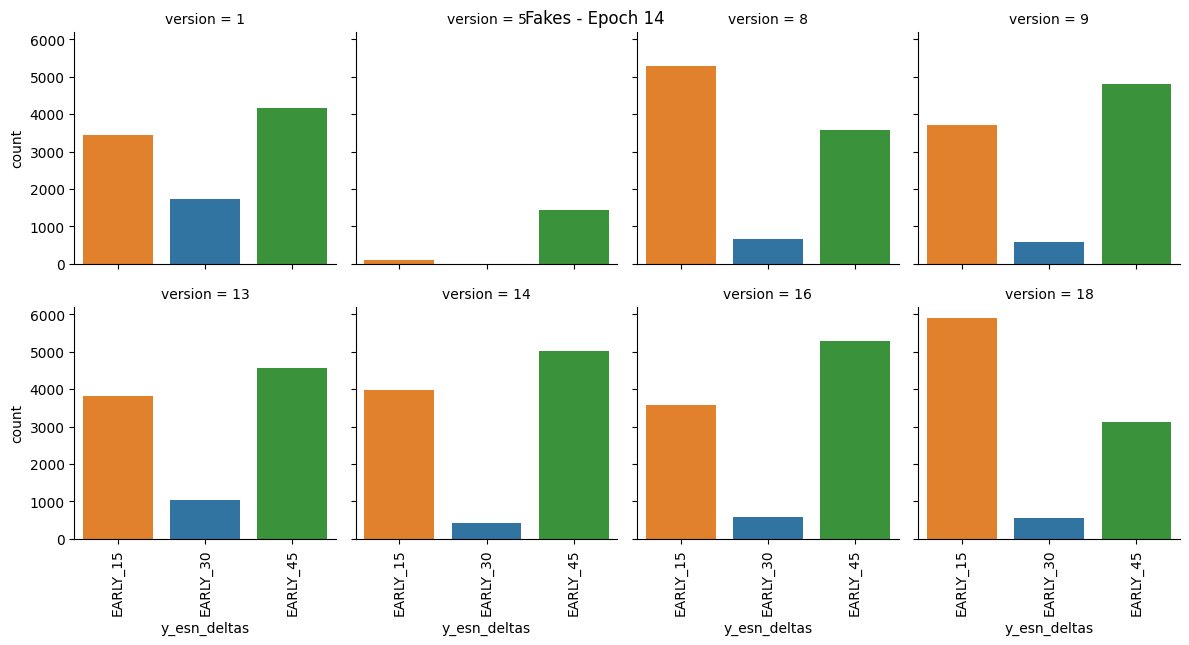

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

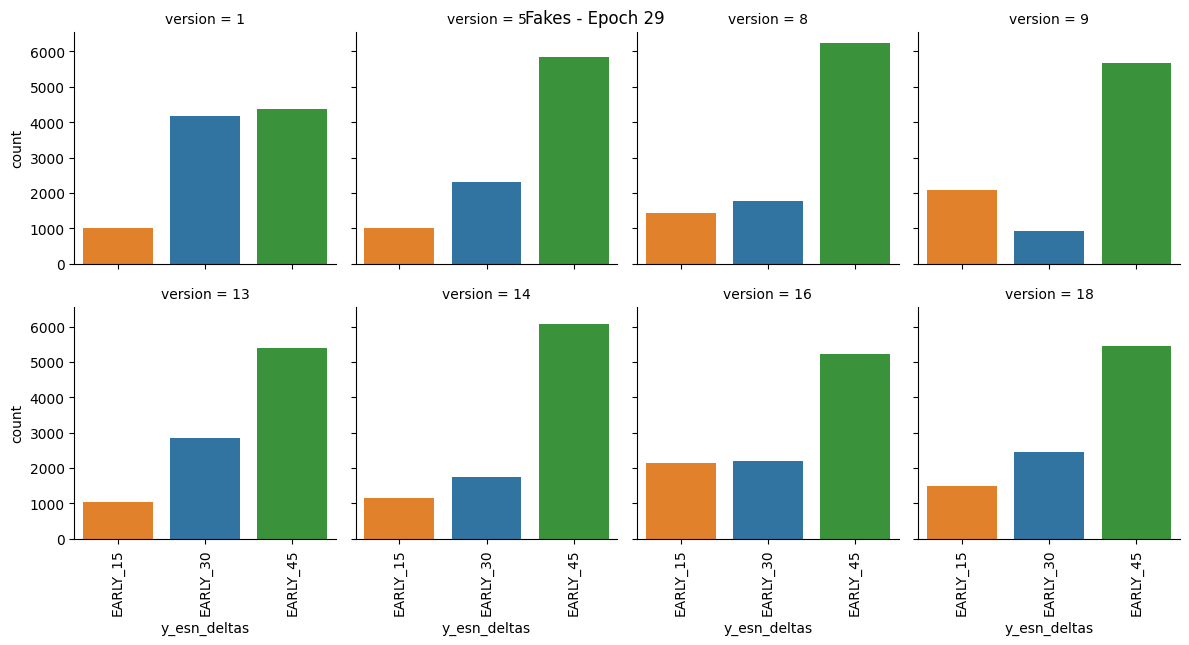

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

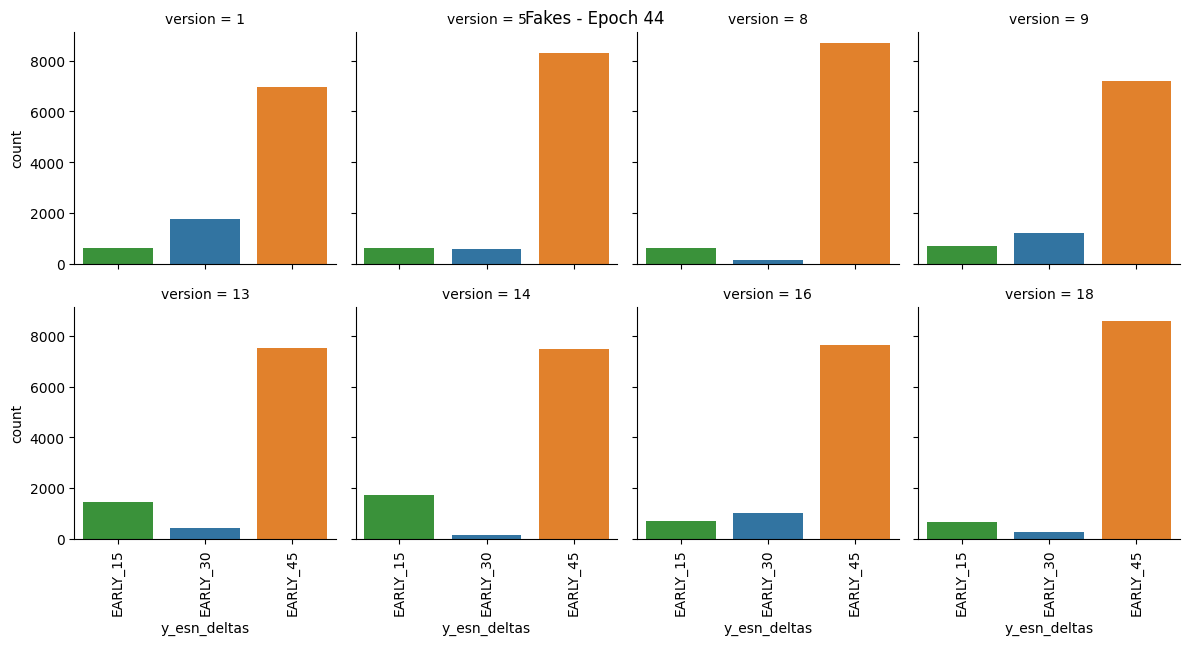

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

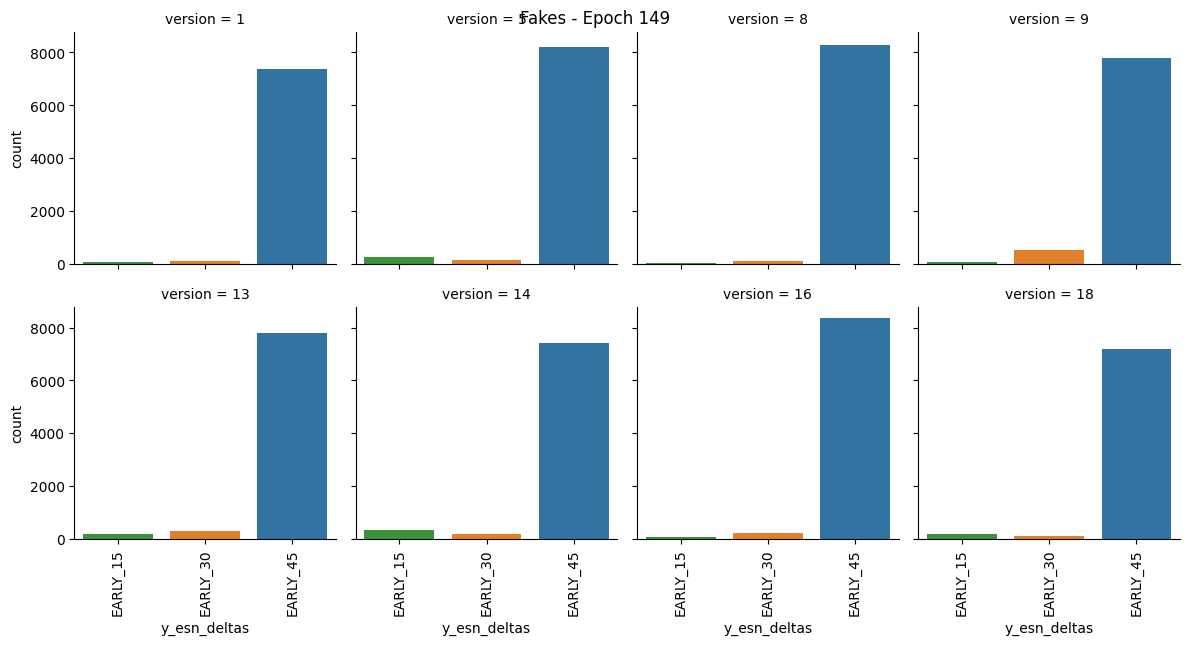

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

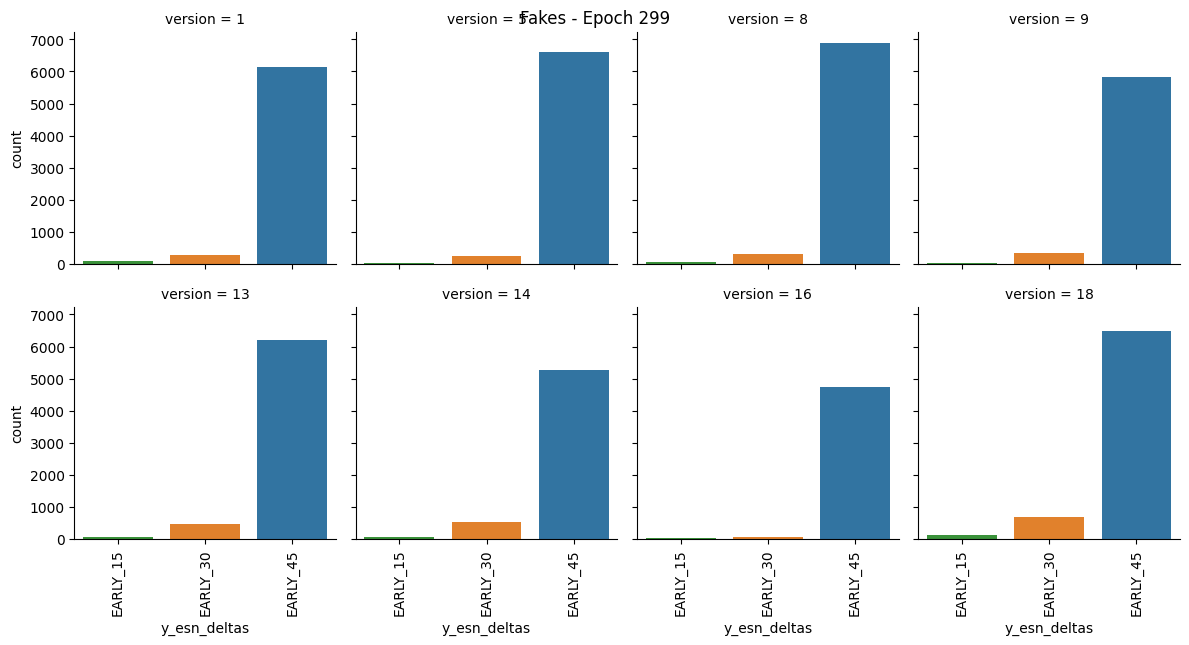

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

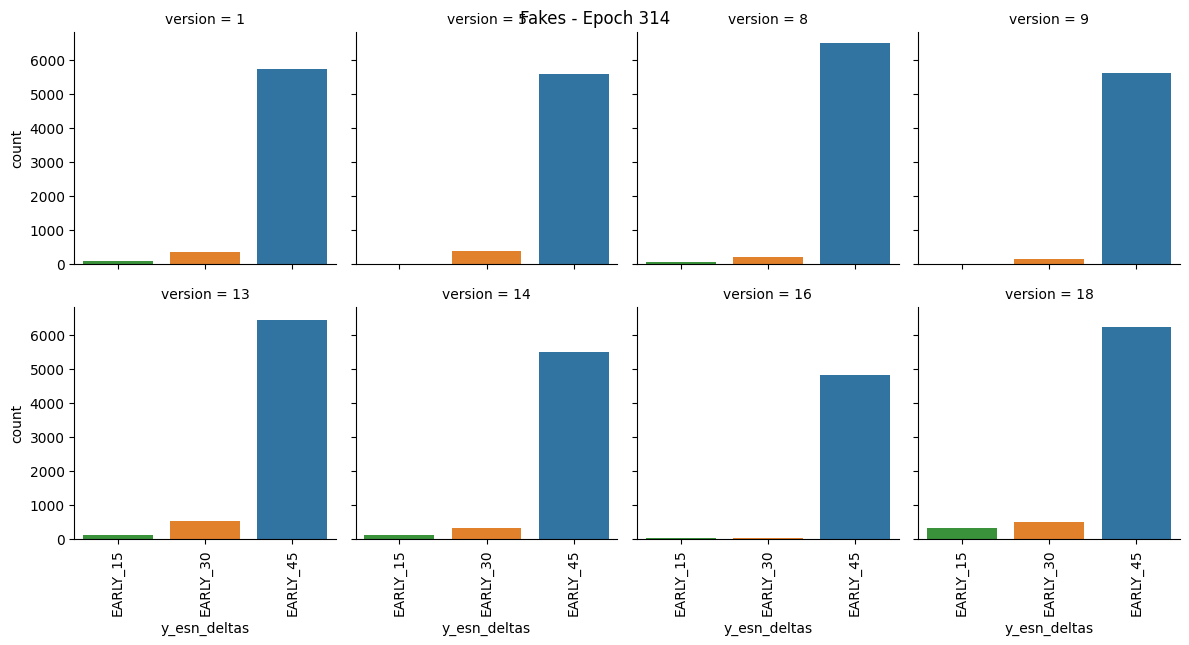

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

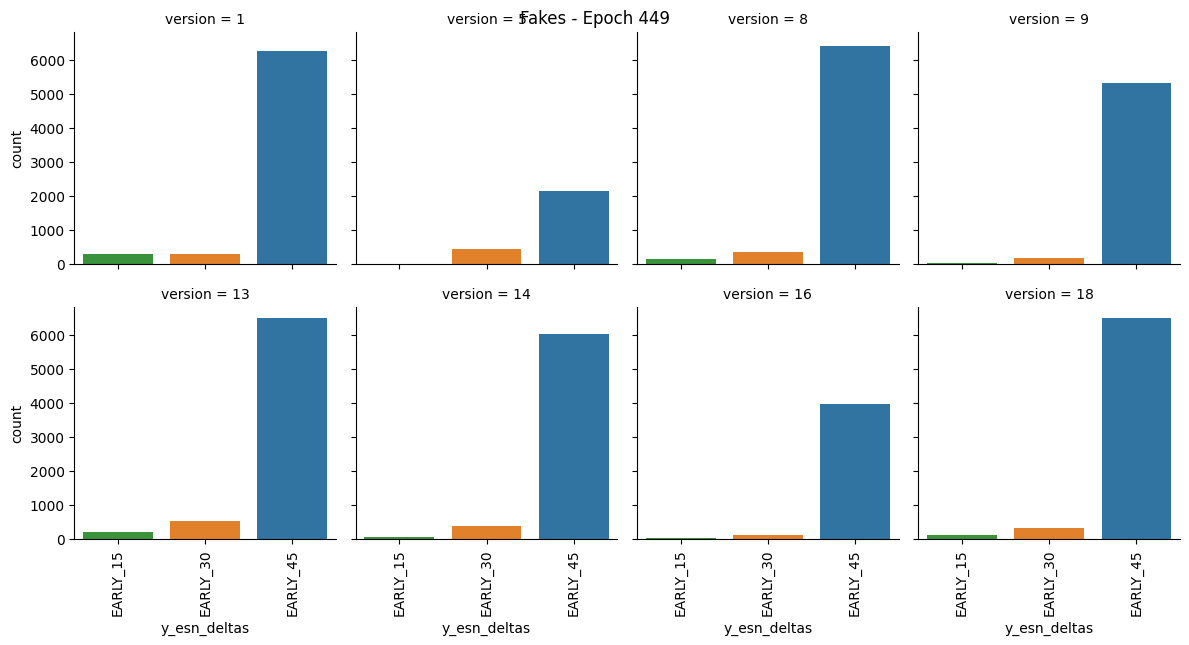

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

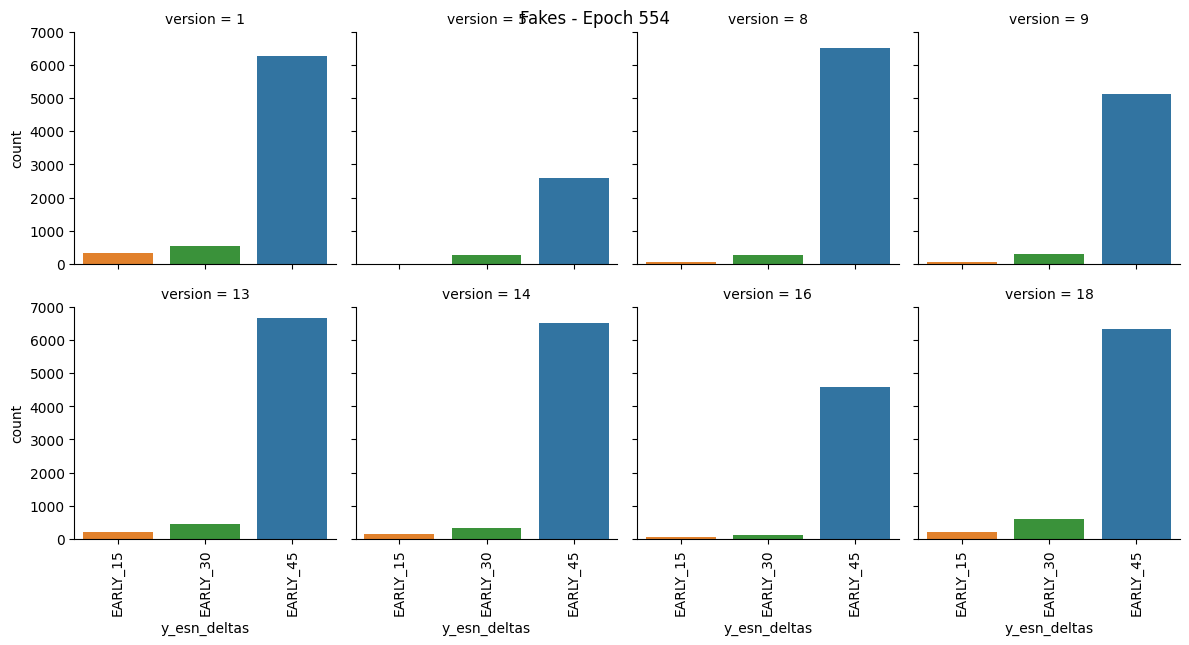

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

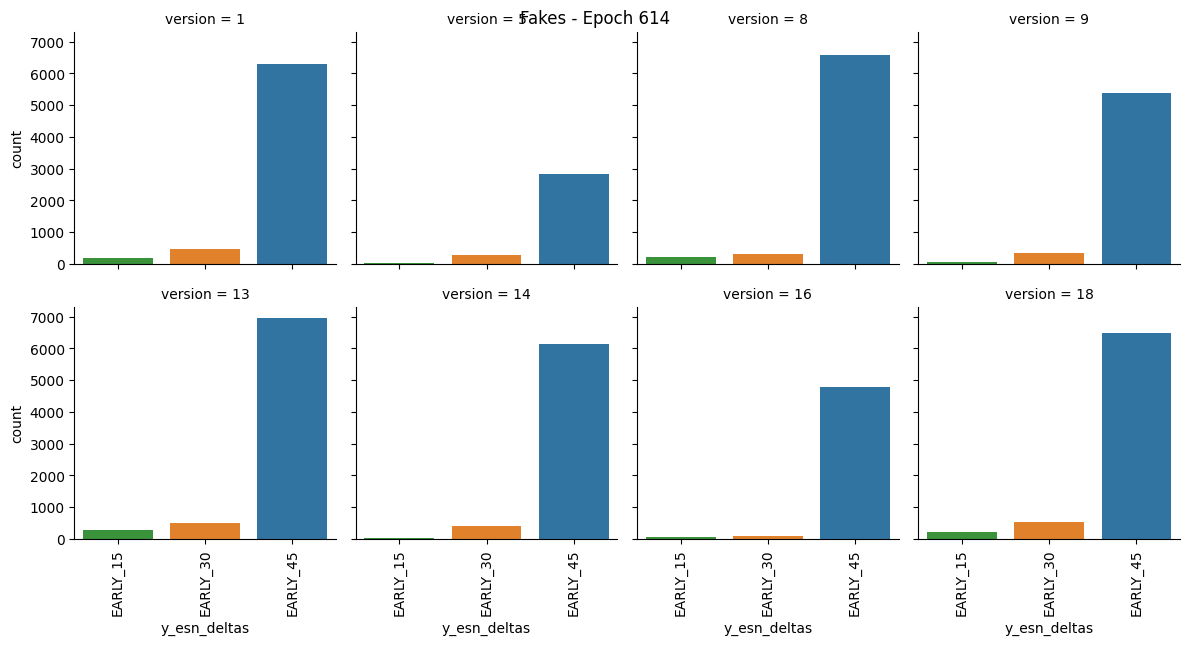

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

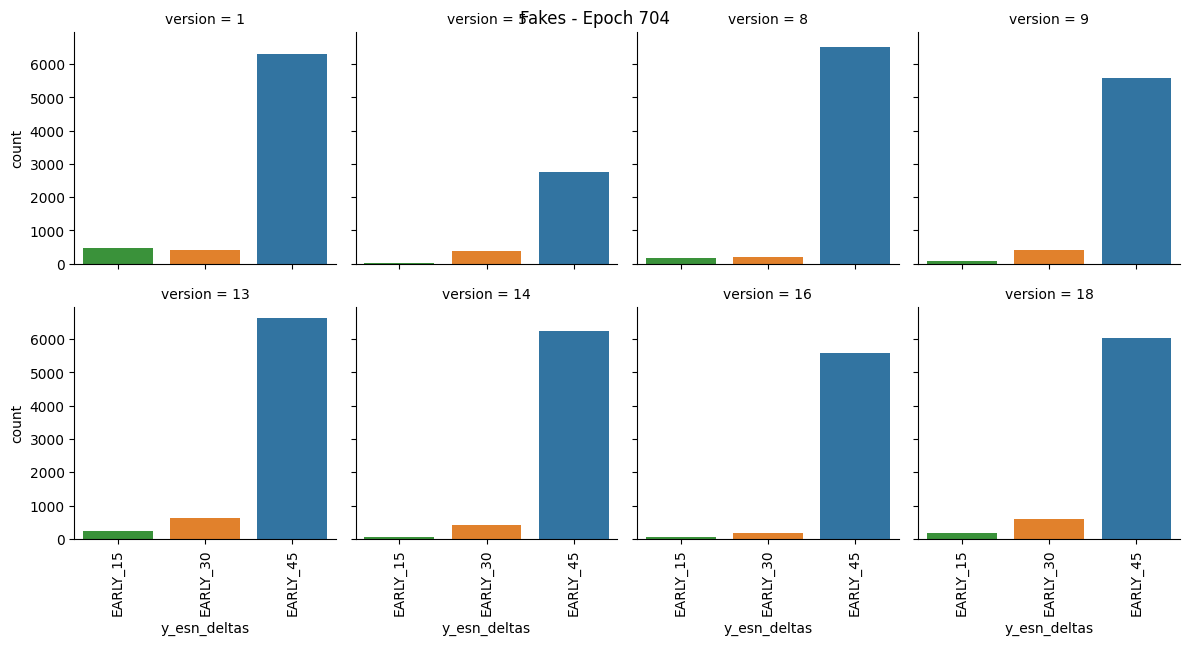

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

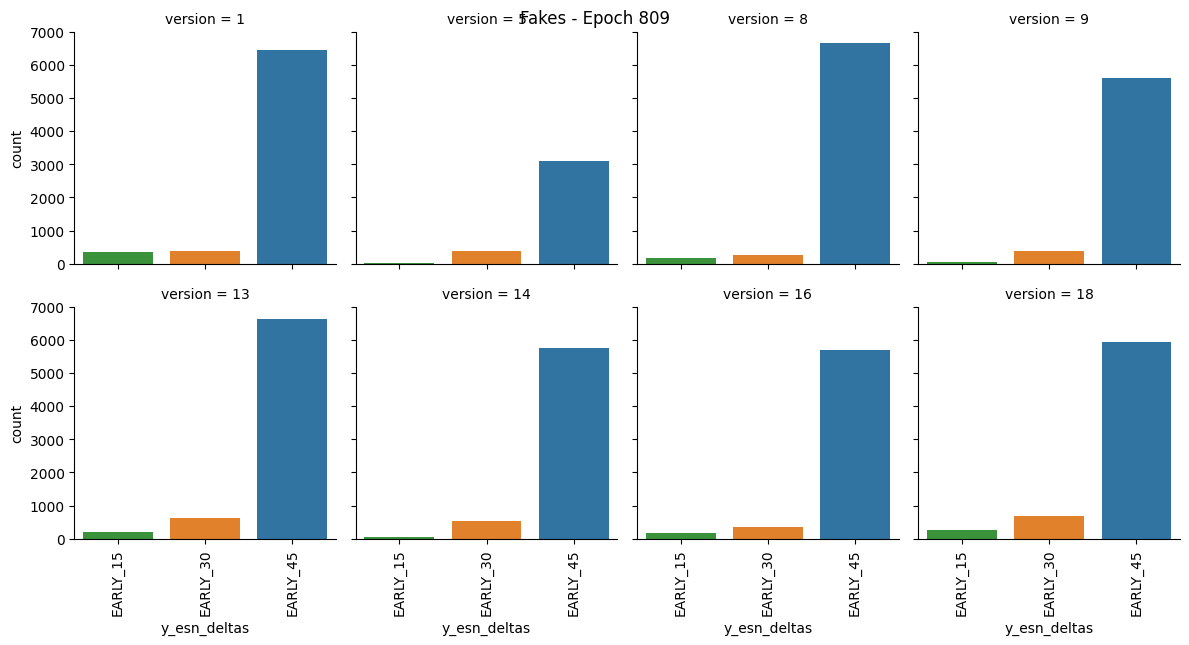

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

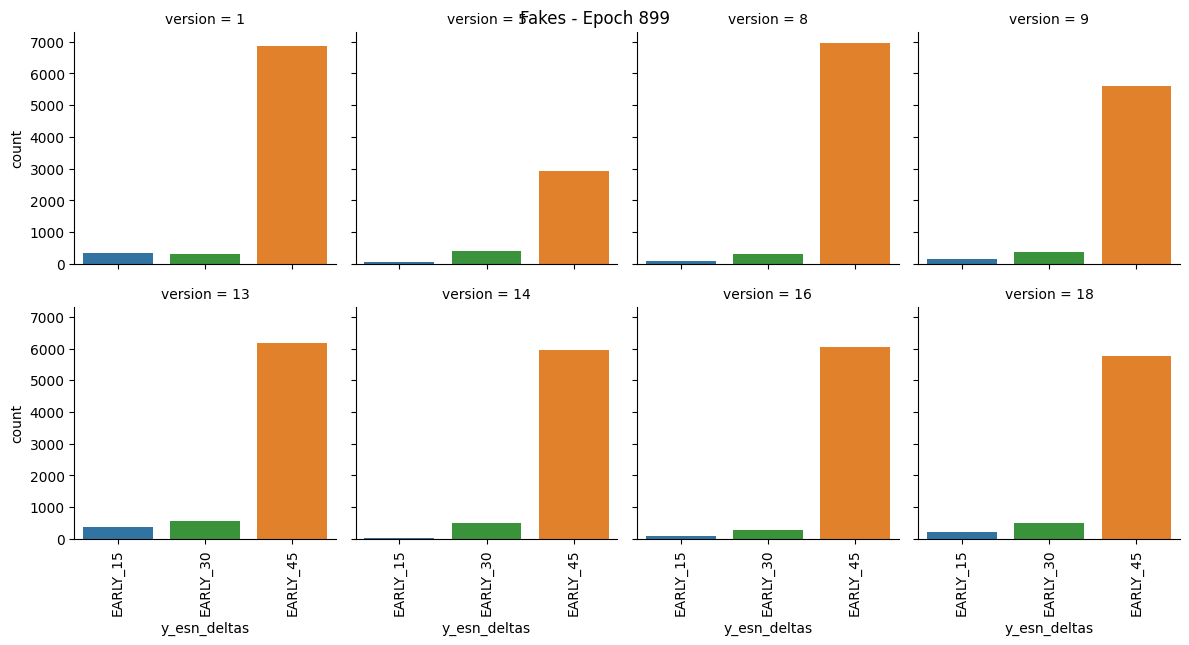

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

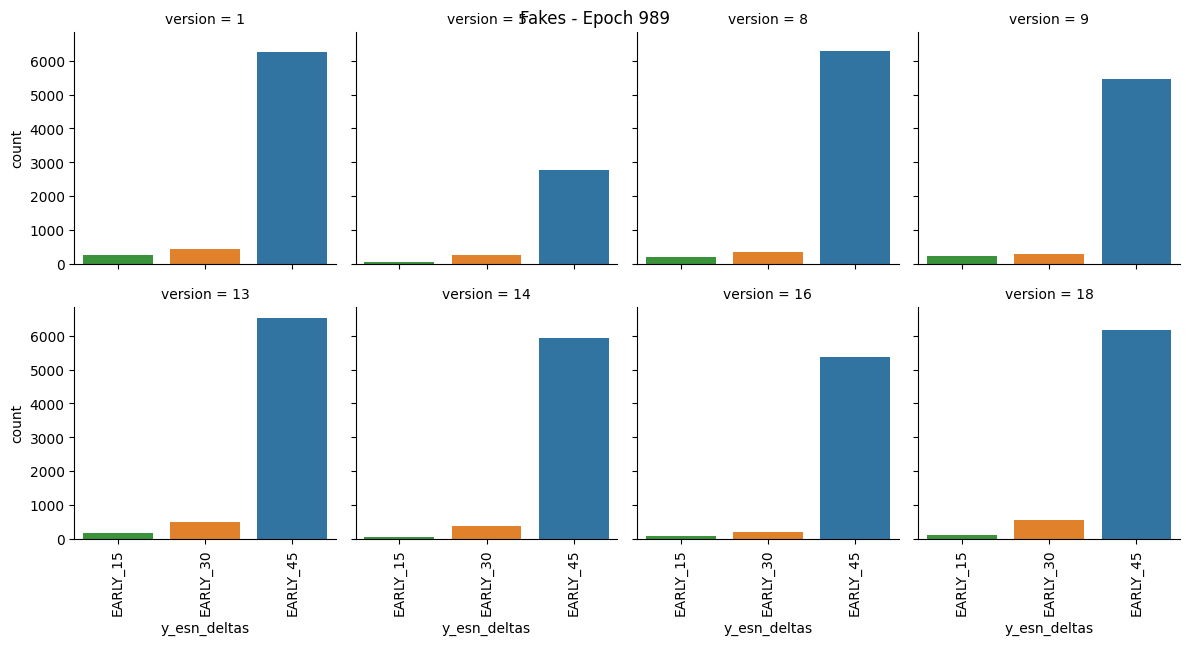

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

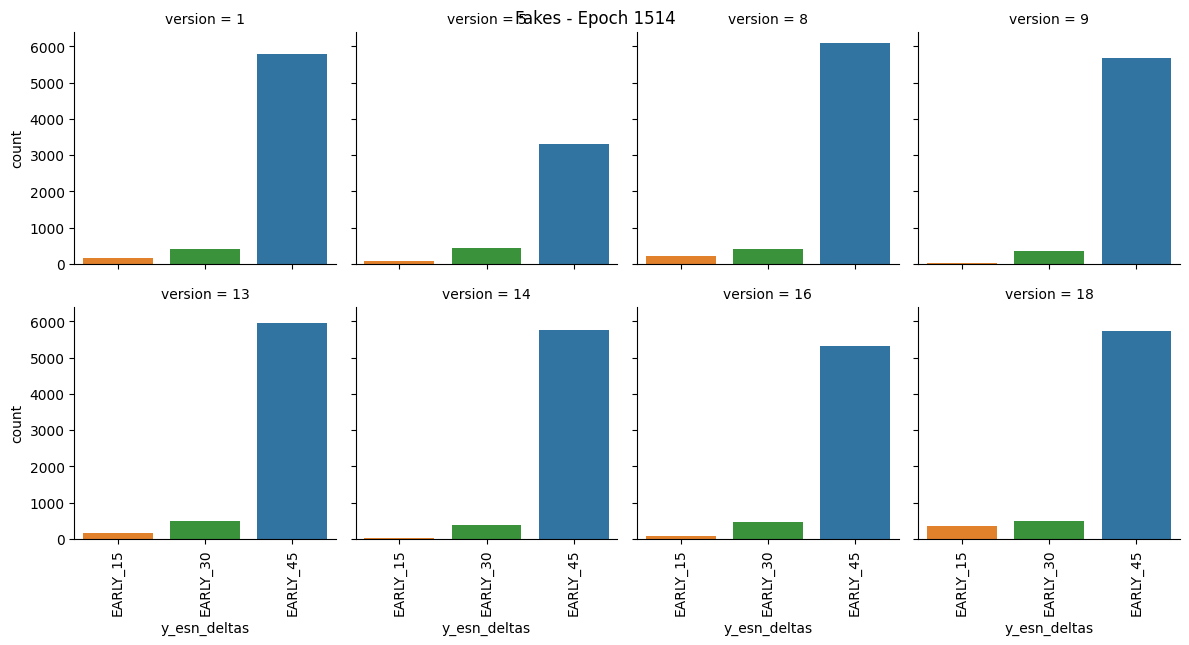

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout 
has changed to tight
  self._figure.tight_layout(*args, **kwargs)

<Figure size 640x480 with 0 Axes>

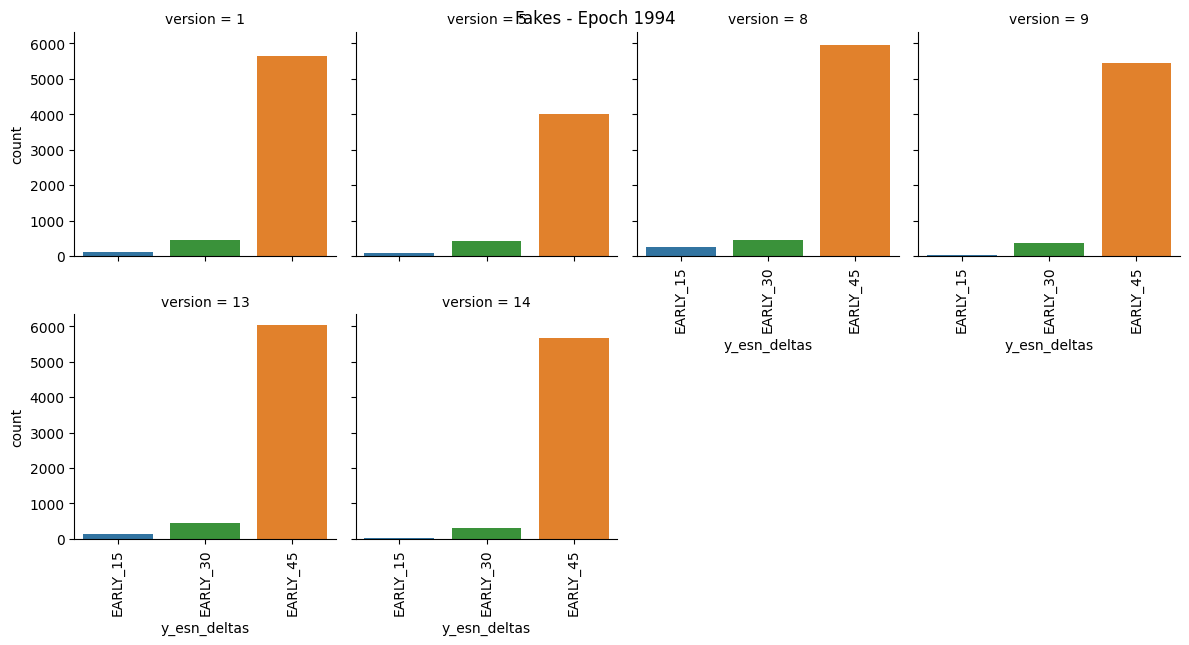

In [57]:
variable = "y_esn_deltas"
count_report = reports / f"counts-{variable}"
count_report.mkdir(parents=True, exist_ok=True)
for e in track(epochs, "Exporting figures..."):
    plt.clf()
    g = sns.FacetGrid(data=df.query(f"epoch==@e and {variable} in @fakes"), col="version", hue=variable, col_wrap=4)
    g.map(sns.countplot, variable, order=fakes, hue_order=fakes)
    for ax in g.axes:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    g.figure.suptitle(f"Fakes - Epoch {e}")
    plt.show()
    # plt.savefig(count_report / f"fakes_count-{variable}-epoch_{e}.pdf", bbox_inches="tight")

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


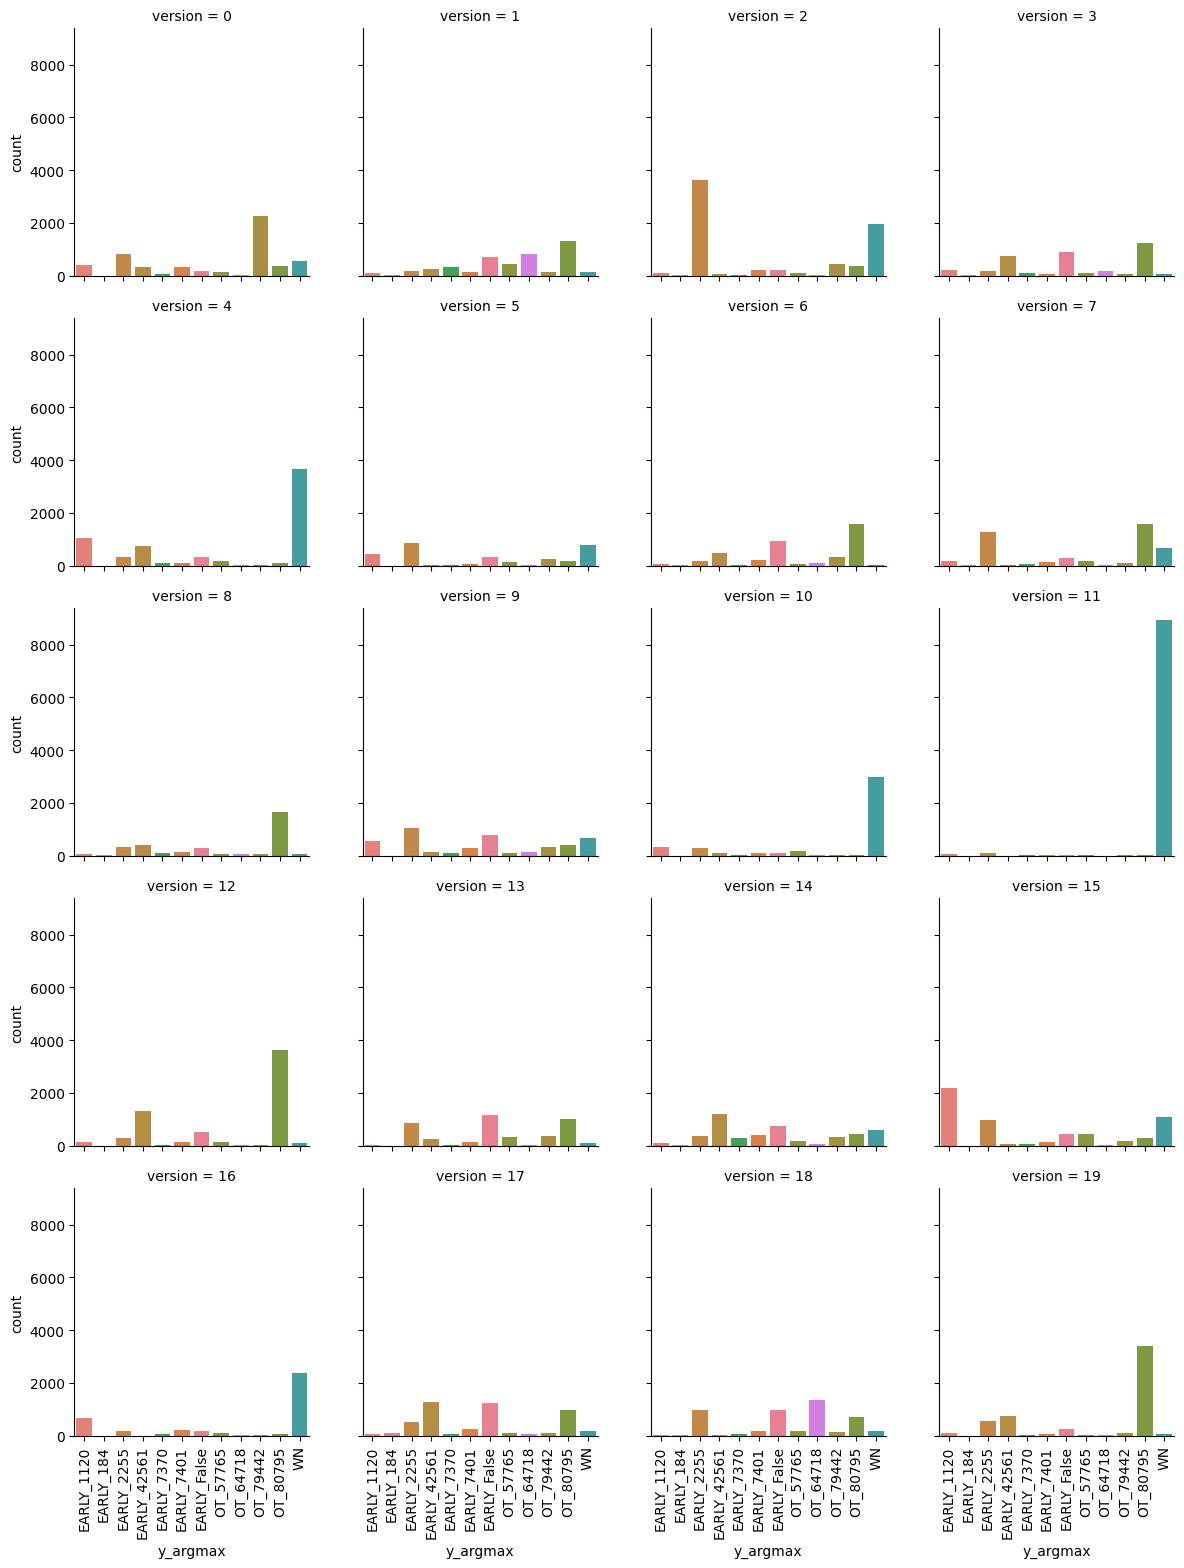

In [15]:
g = sns.FacetGrid(data=df.query("epoch==614 and y in @fakes"), col="version", hue="y_argmax", col_wrap=4)
# sns.barplot(agg_lbl.query("epoch==989 and version==14")[reals])
g.map(sns.countplot, "y_argmax", order=fakes, hue_order=fakes)
for ax in g.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

In [23]:
variable = "y_esn_classic"
agg_lbl = pd.pivot_table(df, values="idx", index=["version", "epoch"], columns=[variable], aggfunc="count")\
  .fillna(0)\
  .astype(int)\
  .sort_index()

agg_lbl["X"] = agg_lbl[fakes].sum(axis=1)
agg_lbl["X_med"] = agg_lbl[fakes].median(axis=1)
agg_lbl["Real_med"] = agg_lbl[reals].median(axis=1)
agg_lbl

KeyError: 'idx'

In [70]:
agg_lbl.to_csv(reports / f"counts-{variable}.csv", index=False)

## Scoring

Using:
1. Count of classes with proportion above ideal, for real classes ($1/16$ of all Real samples).
2. Real proportion among all produced samples (for each real class should be $1/17$, idealy)
3. Distance to ideal proportion among all samples (Real and Fakes) ($\mathrm{real prop} - 1/17$).
4. Kurtosis of real distribution (very weak proxy of tailness of distribution; should be close to $-1.2$, kurtosis of uniform distribution)

### Count of classes with proportion above ideal (per instance/per epoch)

ValueError: Unknown format code 'd' for object of type 'float'

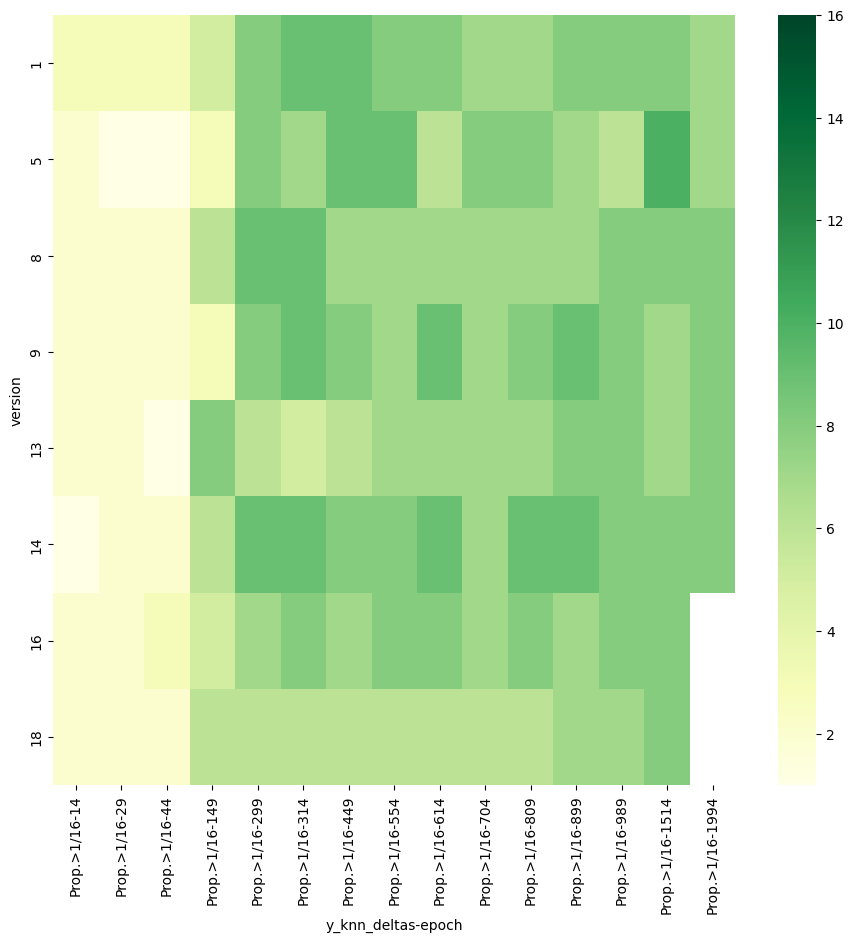

In [71]:
agg_real = agg_lbl[reals]
agg_real = agg_real.apply(lambda x: x/x.sum(), axis=1)
agg_real["Prop.>1/16"] = (agg_real >= 1/len(reals)).sum(axis=1)
real_share_map = agg_real[["Prop.>1/16"]].unstack()
plt.figure(figsize=(11, 10))
sns.heatmap(real_share_map, cmap="YlGn", annot=True, fmt="d", vmax=16)
# plt.savefig(reports / f"prop_count-{variable}.pdf", bbox_inches="tight")

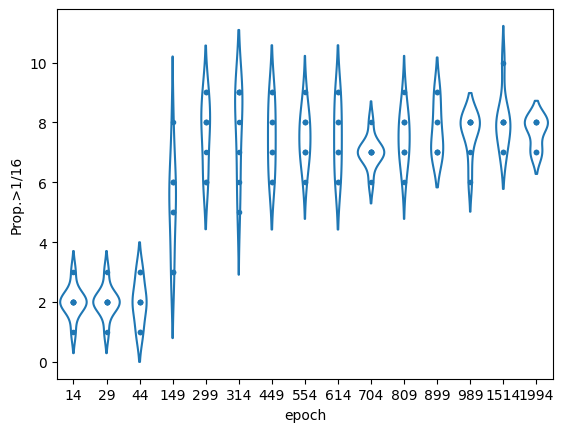

In [72]:
real_share_df = agg_real[["Prop.>1/16"]].reset_index()
sns.violinplot(real_share_df, x="epoch", y="Prop.>1/16", fill=False, inner="points")
plt.savefig(reports / f"prop_count_distne message-{variable}.pdf", bbox_inches="tight")

### Score

$$S = dist + 0.1 kurtosis - prop$$

Where $dist$ is the sum of distances to ideal proportion, per class, $kurtosis$ is the kurtosis of the Real proportions distribution, $prop$ is the proportion of Real samples among all samples (ideal would be $16/17$)

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<Axes: xlabel='epoch', ylabel='Score'>

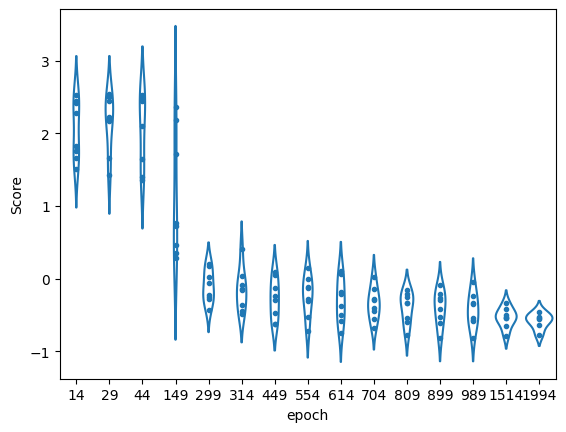

In [81]:
lbl_17 = agg_lbl[reals + ["X"]]

# proportions of syllables
lbl_17 = lbl_17.apply(lambda x: x/lbl_17.sum(axis=1), axis=0)
lbl_17["Real_prop"] = lbl_17[reals].sum(axis=1)
lbl_17["Real_dist"] = (lbl_17[reals] - 1/17).abs().sum(axis=1)
lbl_17["Real_kurtosis"] = lbl_17[reals].kurt(axis=1)

ideal_prop = 16/17

lbl_17["Score"] = lbl_17["Real_dist"] + 0.1*lbl_17["Real_kurtosis"] - lbl_17["Real_prop"]

sns.violinplot(lbl_17, x="epoch", y="Score", fill=False, inner="points")

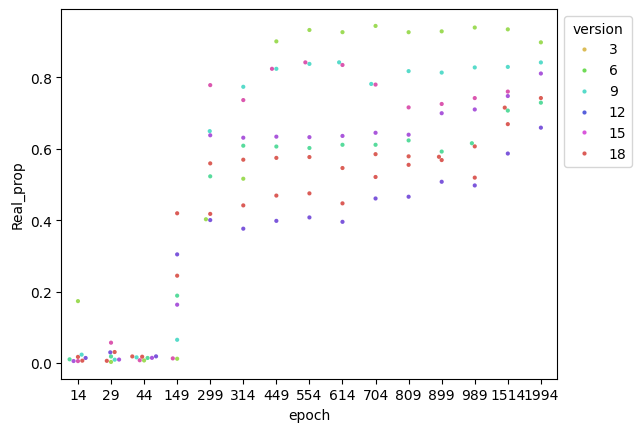

In [74]:
ax = sns.swarmplot(lbl_17, x="epoch", y="Real_prop", hue="version", palette="hls", size=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

/home/nathan/Code/pmseq/venv/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


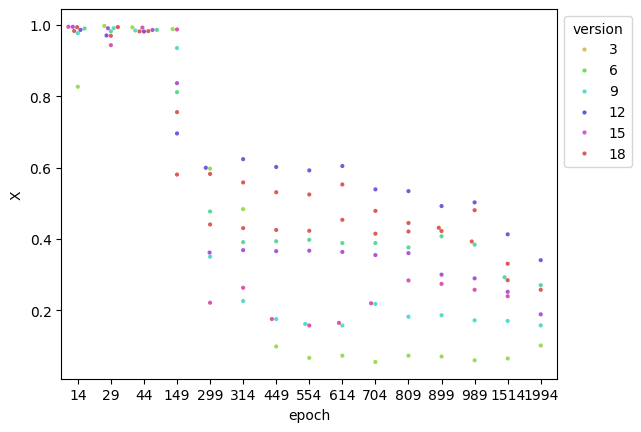

In [75]:
ax = sns.swarmplot(lbl_17, x="epoch", y="X", hue="version", palette="hls", size=3)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

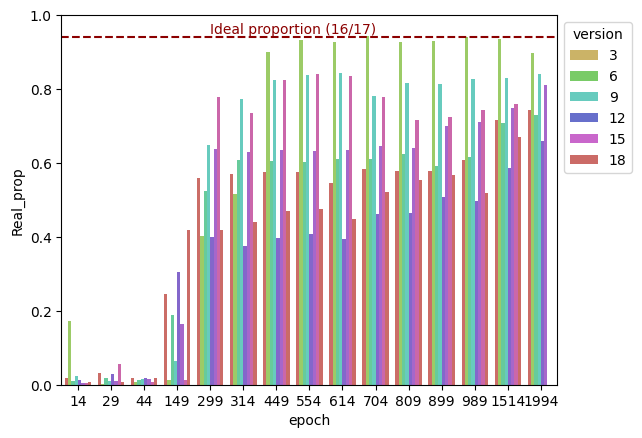

In [76]:
ax = sns.barplot(lbl_17, x="epoch", y="Real_prop", hue="version", palette="hls")
plt.ylim(0, 1)
plt.axhline(16/17, color="darkred", linestyle="--")
plt.text(4, 0.95, "Ideal proportion (16/17)", color="darkred")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig(reports / f"real_prop-{variable}.pdf", bbox_inches="tight")

In [77]:
lbl_17.sort_values(by="Score", ascending=True)[["Score", "Real_dist", "Real_prop", "Real_kurtosis"]].head(20)

y_knn_deltas      Score  Real_dist  Real_prop  Real_kurtosis
version epoch                                               
5       899   -0.822166   0.166794     0.9289      -0.600598
        989   -0.819247   0.154694     0.9396      -0.343410
        1514  -0.786594   0.134653     0.9345       0.132530
        809   -0.778598   0.154700     0.9265      -0.067985
        1994  -0.775552   0.158794     0.8981      -0.362458
        614   -0.747915   0.181494     0.9266      -0.028087
        554   -0.718477   0.141653     0.9327       0.725705
        704   -0.680417   0.182100     0.9441       0.815834
16      1514  -0.660205   0.257647     0.7602      -1.576516
9       1994  -0.645426   0.240094     0.8418      -0.437203
5       449   -0.623925   0.153847     0.9008       1.230283
9       449   -0.623735   0.274494     0.8240      -0.742290
        899   -0.615781   0.241741     0.8134      -0.441219
        809   -0.591705   0.282888     0.8175      -0.570937
        614   -0.585092   0.242935     0.8421       0.140724
16      989   -0.584178   0.288894     0.7420      -1.310716
9       989   -0.573834   0.263988     0.8278      -0.100223
8       1994  -0.562022   0.302841     0.7291      -1.357630
16      704   -0.555872   0.265988     0.7798      -0.420604
14      989   -0.549734   0.314641     0.7101      -1.542753

In [36]:
lbl_17.sort_values(by="Score", ascending=True)[["Score", "Real_dist", "Real_prop", "Real_kurtosis"]]\
    .to_csv(reports / f"scores-{variable}.csv", index=False)

<Axes: xlabel='epoch', ylabel='Real_kurtosis'>

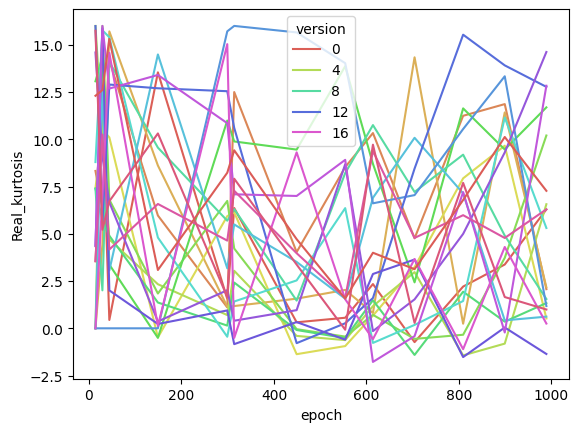

In [37]:
sns.lineplot(lbl_17, x="epoch", y="Real_kurtosis", hue="version", palette="hls")

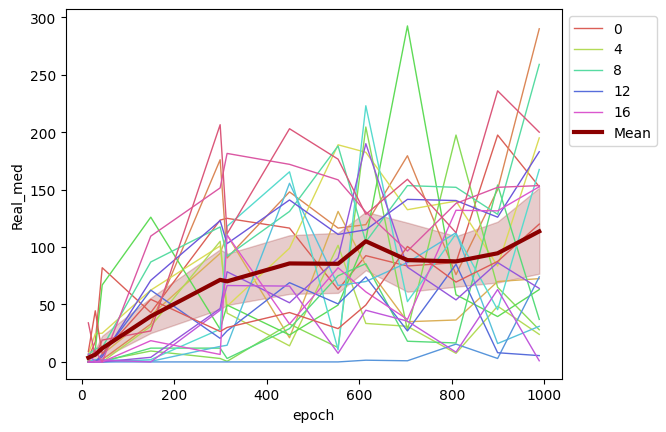

In [38]:
sns.lineplot(agg_lbl, x="epoch", y="Real_med", hue="version", palette="hls", lw=1)
sns.lineplot(agg_lbl, x="epoch", y="Real_med", lw=3, color="darkred", label="Mean")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [39]:
best_version, best_epoch = lbl_17["Score"].idxmin()
best_version, best_epoch

(13, 809)

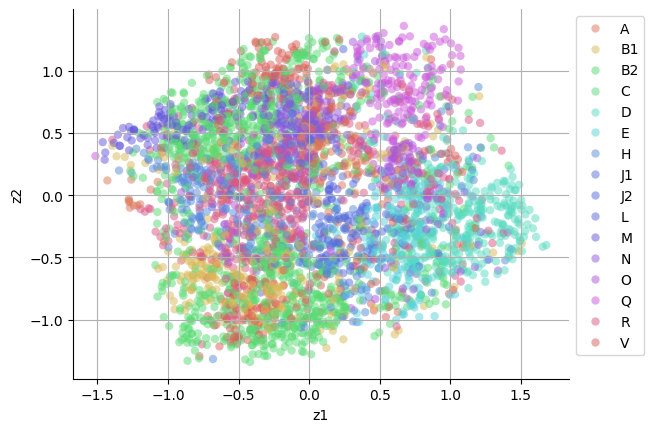

In [40]:
from sklearn.decomposition import PCA

zdf = df.query("version==@best_version & epoch==@best_epoch & y not in @fakes")
z3d = np.vstack(zdf.z.values)

pca = PCA(n_components=2)
z2d = pca.fit_transform(z3d)

lbl = sorted(zdf.y.values.tolist())
colors = [f"C{reals.index(i)}" if i in reals else (0, 0, 0, 0.1) for i in lbl]
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(z[:, 0], z[:, 1], z[:, 2])

embed = pd.DataFrame({"label": zdf.y , "z1": z2d[:, 0], "z2": z2d[:, 1]})

sns.scatterplot(embed, x="z1", y="z2", hue="label", lw=0, alpha=0.5, hue_order=lbl, palette="hls")
sns.despine()
plt.grid()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [88]:
best_gens = df.query("version==13 & epoch==809 & y_argmax not in @fakes")
file = best_gens.file.unique()[0]
print(file)
d = np.load(file)
syll_store = {}
for y in reals:
    meta = best_gens.query("y_argmax==@y")
    idxs = meta.idx.values.tolist()
    x = d["x"][idxs]
    syll_store[y] = x

/run/media/nathan/Nathan4T/Nathan-canarygan/generation/version_13/generation-version_13-epoch_809-step_72900.npz


In [89]:
syll_store["A"].shape

(448, 16384)

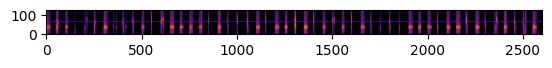

In [90]:
track = []
sr = 16000
for i, arr in enumerate(syll_store["R"]):
    # a, idx = lbr.effects.trim(arr, top_db=20)
    track.append(arr[:round(sr*0.5)])
    if i > 50:
        break

track = np.concatenate(track)
hop_length = round(sr * 0.01)
win_length = round(sr * 0.02)
spec = lbr.feature.melspectrogram(y=track, sr=sr, hop_length=hop_length, win_length=win_length, fmin=2000, fmax=8000)
spec = lbr.power_to_db(spec)

plt.imshow(spec, origin="lower", cmap="inferno")

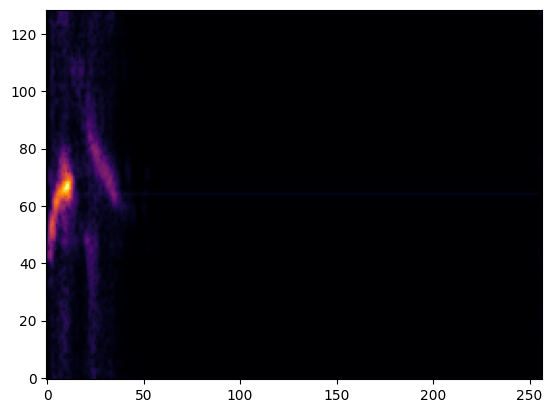

In [104]:
specs = lbr.stft(y=syll_store["J2"], hop_length=64, n_fft=256, win_length=256)
specs = np.log(1 + 100 * np.abs(specs) ** 2)
specs_mean = specs.mean(axis=0)
plt.imshow(specs_mean, origin="lower", aspect="auto", cmap="inferno")

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

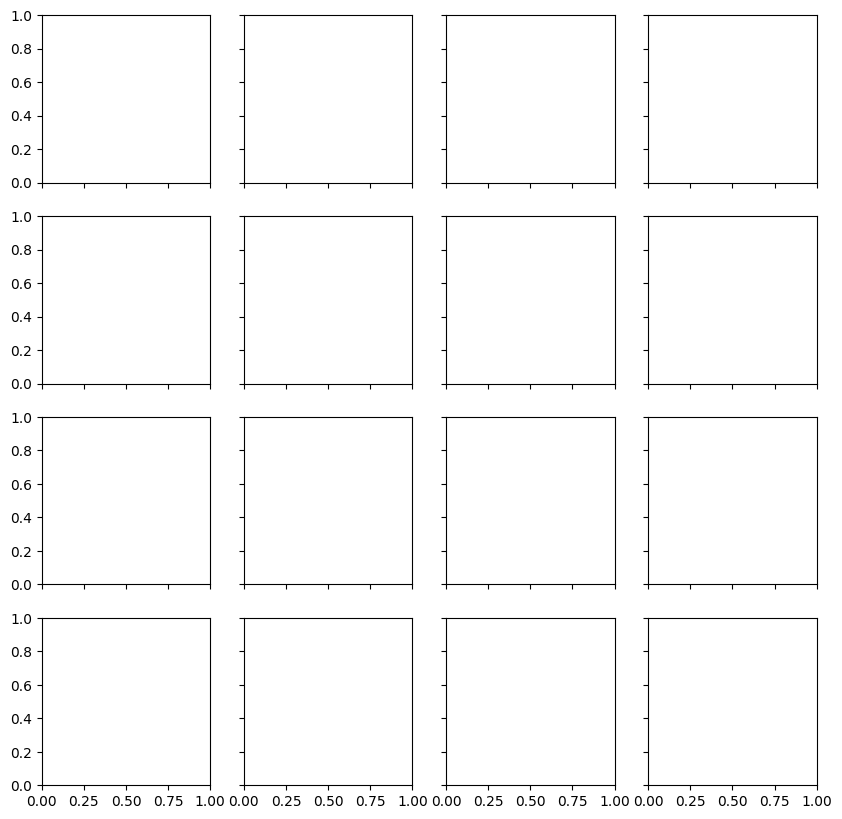

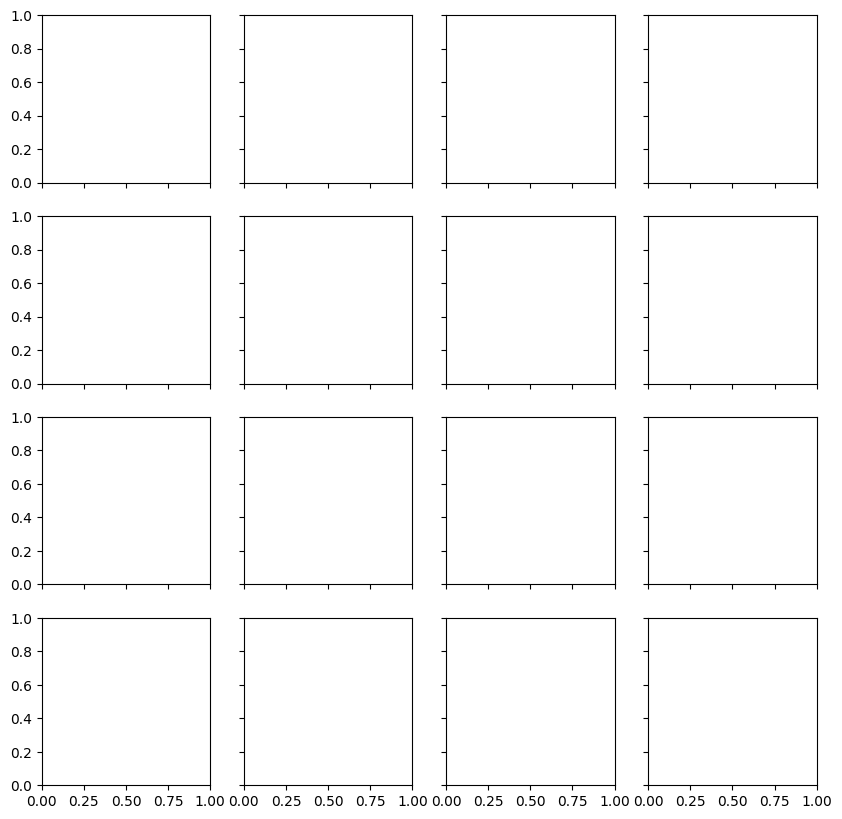

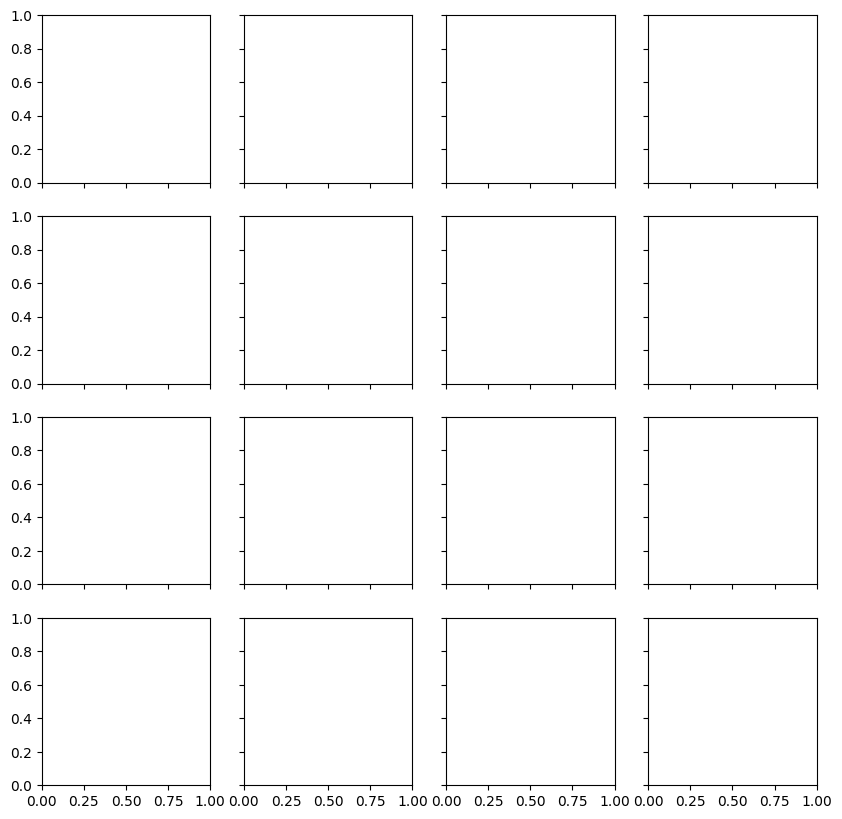

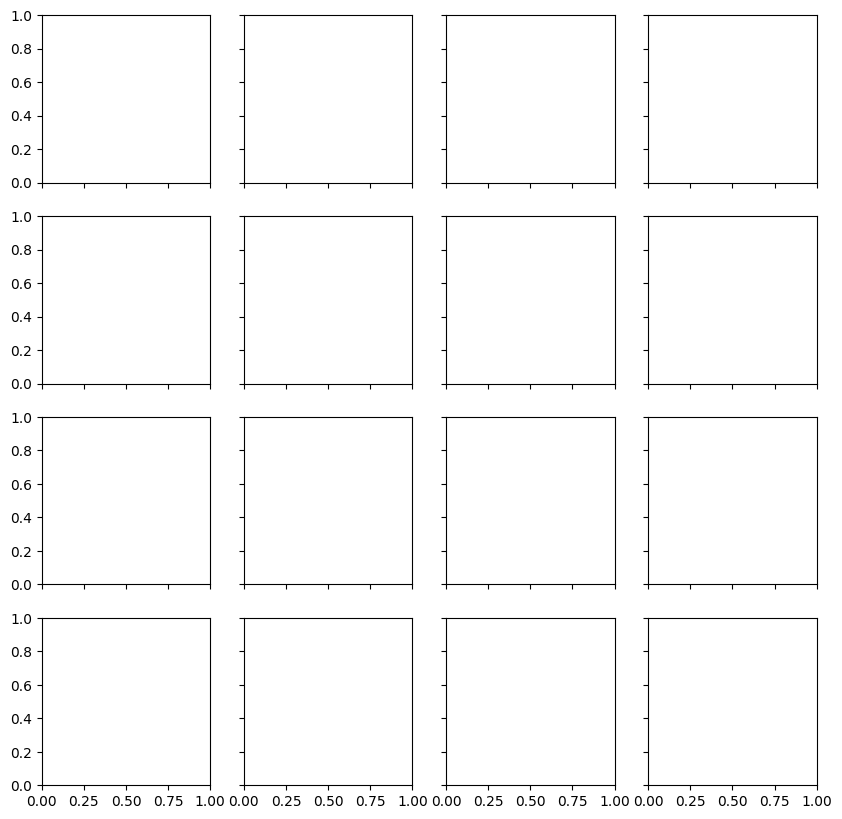

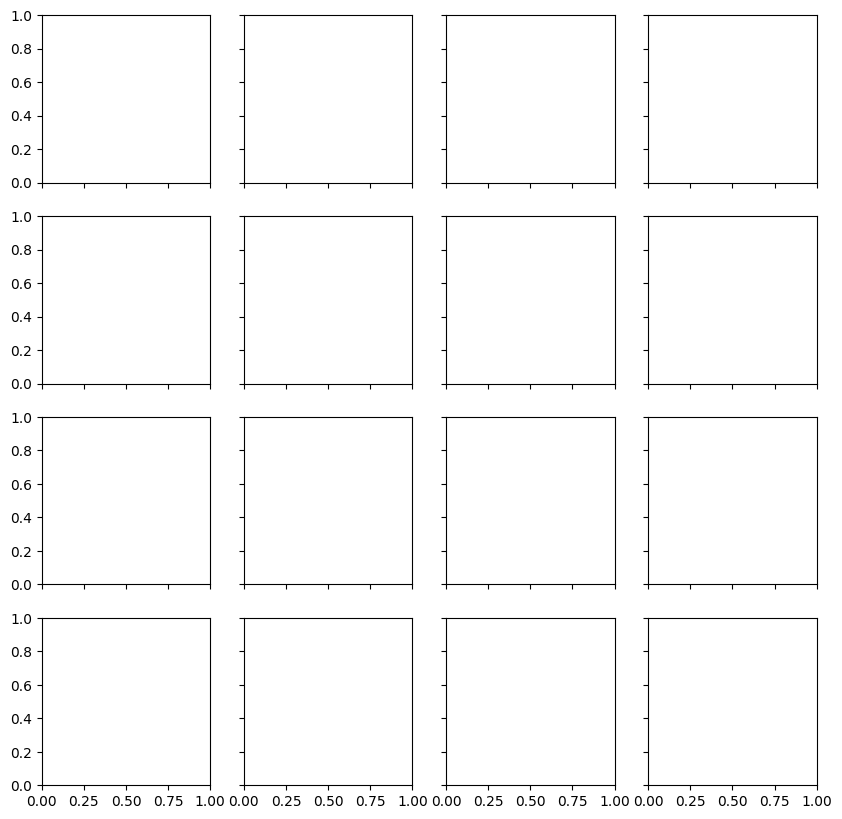

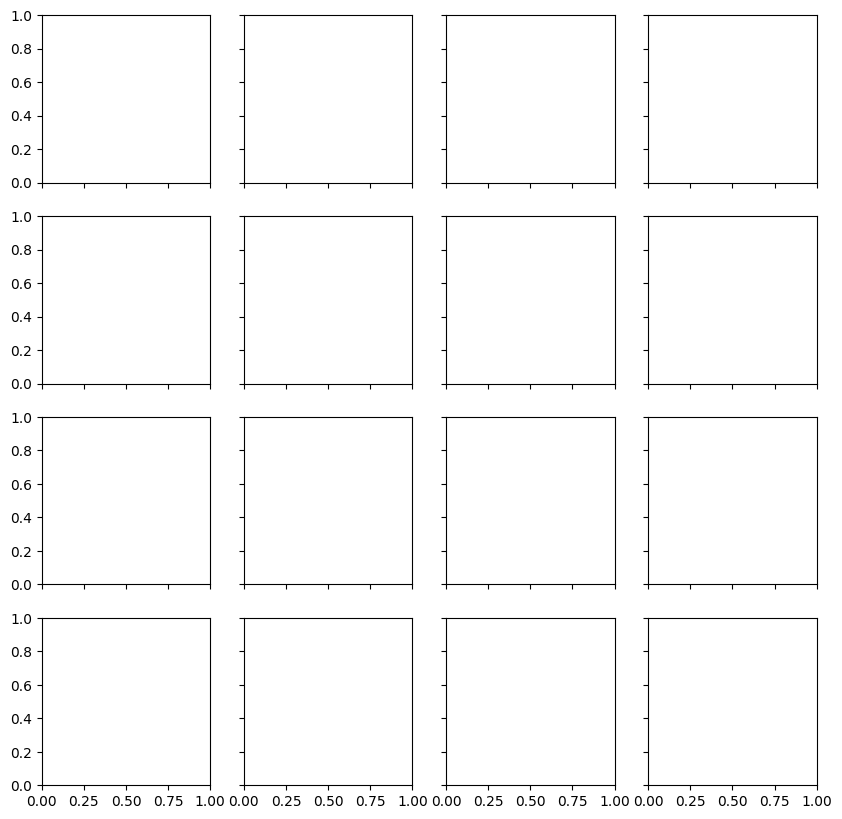

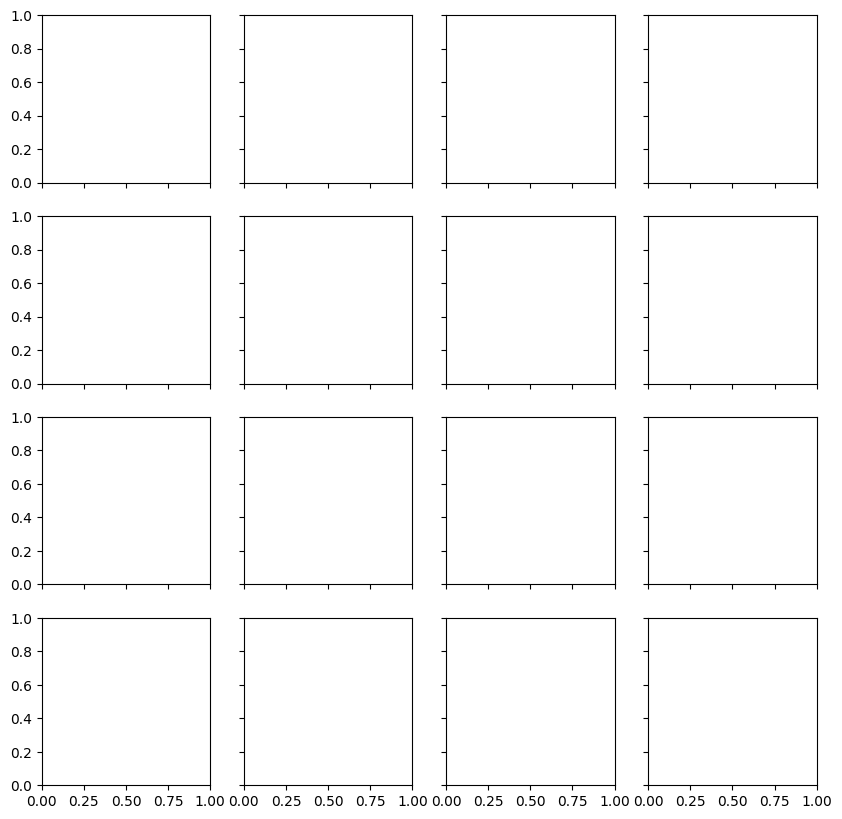

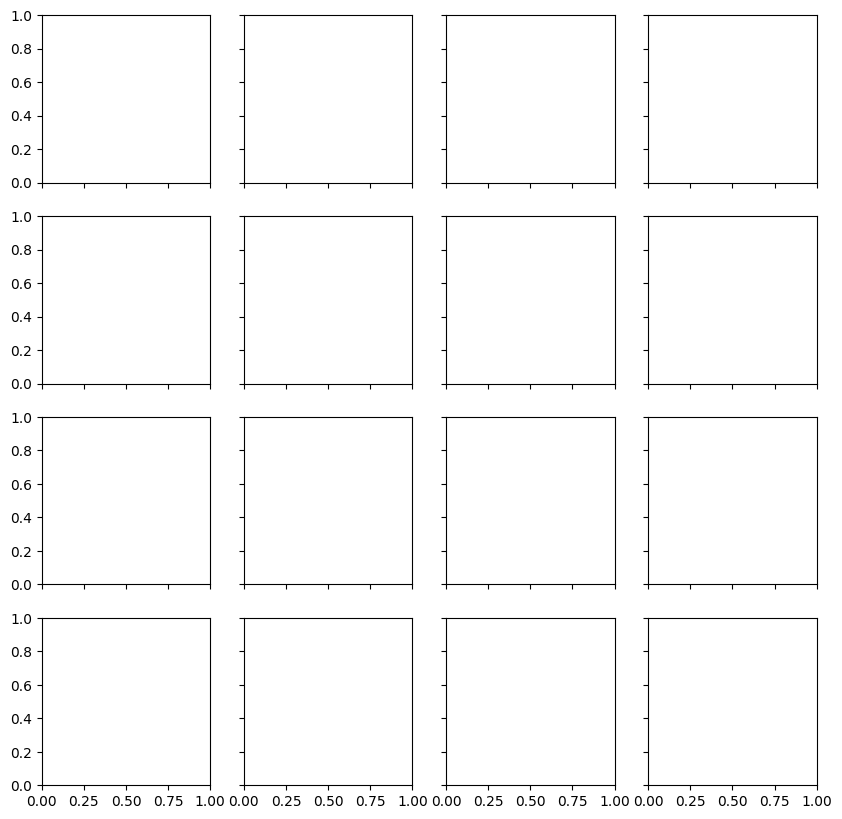

In [45]:
spec_report = reports / f"mean_spectrogram-{variable}"
spec_report.mkdir(parents=True, exist_ok=True)

max_step = round(16000 * 0.3)

for v in versions:
    for e in track(epochs):
        fig, axs = plt.subplots(4, 4, figsize=(10, 10), sharex=True, sharey=True)
        axs = axs.flatten()
        
        sel_df = df.query(f"version==@v & epoch==@e & {variable} not in @fakes")
        if len(sel_df) == 0:
            continue
            
        file = sel_df.file.unique()[0]
        d = np.load(file)
        syll_store = {}
        for y in reals:
            meta = sel_df.query(f"{variable}==@y")
            idxs = meta.idx.values.tolist()
            x = d["x"][idxs]
            syll_store[y] = x[:, :max_step]

        for i, (y, x) in enumerate(syll_store.items()):
            ax = axs[i]
            n = x.shape[0]
            if n == 0:
                ax.set_title(f"{y} (n={n})")
                continue
                
            specs = lbr.stft(y=x, hop_length=64, n_fft=256, win_length=256)
            specs = np.log(1 + 100 * np.abs(specs) ** 2)
            specs_mean = specs.mean(axis=0)

            ax.imshow(specs_mean, origin="lower", aspect="auto", cmap="inferno")
            ax.set_title(f"{y} (n={n})")
            
        fig.savefig(spec_report / f"mean_spec-version_{v}-epoch_{e}-{variable}.pdf", bbox_inches="tight")
        plt.close()